In [5]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import glob
import os

In [7]:
train_data = pd.read_csv('./dataset/GAN_train.csv')

In [8]:
train_data.shape

(500, 17)

In [9]:
#train_data = train_data.values.reshape(train_data.shape[0],train_data.shape[1],1)

In [10]:
train_data.shape

(500, 17)

In [11]:
train_data = train_data.astype('float32')


In [12]:
train_data['a1'].fillna((train_data['a1'].mean()), inplace= True)
train_data['a2'].fillna((train_data['a2'].mean()), inplace= True)
train_data['a3'].fillna((train_data['a3'].mean()), inplace= True)
train_data['a4'].fillna((train_data['a4'].mean()), inplace= True)
train_data['a5'].fillna((train_data['a5'].mean()), inplace= True)
train_data['b1'].fillna((train_data['b1'].mean()), inplace= True)
train_data['b2'].fillna((train_data['b2'].mean()), inplace= True)
train_data['b3'].fillna((train_data['b3'].mean()), inplace= True)
train_data['b4'].fillna((train_data['b4'].mean()), inplace= True)
train_data['b5'].fillna((train_data['b5'].mean()), inplace= True)
train_data['b6'].fillna((train_data['b6'].mean()), inplace= True)
train_data['b7'].fillna((train_data['b7'].mean()), inplace= True)
train_data['b8'].fillna((train_data['b8'].mean()), inplace= True)
train_data['b9'].fillna((train_data['b9'].mean()), inplace= True)
train_data['b10'].fillna((train_data['b10'].mean()), inplace= True)
train_data['b11'].fillna((train_data['b11'].mean()), inplace= True)
train_data['b12'].fillna((train_data['b12'].mean()), inplace= True)




In [13]:
train_data


,a1,a2,a3,a4,a5,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12
0,35.0,17.0,93.0,5.0,53.0,1.0,4.0,1.0,0.0,0.0,4.0,0.0,4.0,0.0,4.0,4.0,0.0
1,21.0,-5.0,79.0,71.0,28.0,0.0,5.0,-1.0,-1.0,0.0,5.0,2.0,3.0,0.0,3.0,2.0,1.0
2,35.0,17.0,65.0,5.0,59.0,0.0,5.0,-1.0,-1.0,0.0,5.0,0.0,5.0,1.0,4.0,4.0,0.0
3,80.0,-1.0,9.0,74.0,59.0,0.0,5.0,-1.0,-1.0,1.0,4.0,1.0,3.0,0.0,3.0,2.0,1.0
4,92.0,62.0,50.0,90.0,76.0,2.0,3.0,2.0,0.0,0.0,3.0,1.0,2.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,64.0,86.0,93.0,103.0,-1.0,2.0,3.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,0.0,1.0
496,78.0,93.0,103.0,-5.0,30.0,2.0,3.0,1.0,1.0,0.0,3.0,1.0,2.0,0.0,2.0,1.0,1.0
497,88.0,102.0,-3.0,20.0,60.0,1.0,4.0,0.0,1.0,1.0,3.0,0.0,3.0,0.0,3.0,2.0,1.0
498,92.0,-3.0,13.0,61.0,77.0,1.0,4.0,1.0,0.0,0.0,4.0,0.0,4.0,2.0,2.0,1.0,1.0


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [15]:
scaler.fit(train_data)

MinMaxScaler()

In [16]:
scaled_train_data = scaler.transform(train_data)

In [17]:
scaled_train_data

array([[0.36363634, 0.2       , 0.8909091 , ..., 0.8333334 , 0.8333334 ,
        0.16666667],
       [0.23636363, 0.        , 0.76363635, ..., 0.6666667 , 0.5       ,
        0.33333334],
       [0.36363634, 0.2       , 0.6363636 , ..., 0.8333334 , 0.8333334 ,
        0.16666667],
       ...,
       [0.8454545 , 0.97272724, 0.01818182, ..., 0.6666667 , 0.5       ,
        0.33333334],
       [0.8818182 , 0.01818182, 0.16363636, ..., 0.5       , 0.33333334,
        0.33333334],
       [0.96363634, 0.3454545 , 0.6       , ..., 0.33333334, 0.33333334,
        0.16666667]], dtype=float32)

In [18]:
train_data_MinMax = pd.DataFrame(data=scaled_train_data, columns=["a1", "a2","a3","a4","a5","b1","b2","b3","b4","b5","b6","b7","b8","b9","b10","b11","b12"])
train_data_MinMax

,a1,a2,a3,a4,a5,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12
0,0.363636,0.200000,0.890909,0.090909,0.527273,0.2,0.8,0.333333,0.166667,0.166667,0.833333,0.166667,0.833333,0.166667,0.833333,0.833333,0.166667
1,0.236364,0.000000,0.763636,0.690909,0.300000,0.0,1.0,0.000000,0.000000,0.166667,1.000000,0.500000,0.666667,0.166667,0.666667,0.500000,0.333333
2,0.363636,0.200000,0.636364,0.090909,0.581818,0.0,1.0,0.000000,0.000000,0.166667,1.000000,0.166667,1.000000,0.333333,0.833333,0.833333,0.166667
3,0.772727,0.036364,0.127273,0.718182,0.581818,0.0,1.0,0.000000,0.000000,0.333333,0.833333,0.333333,0.666667,0.166667,0.666667,0.500000,0.333333
4,0.881818,0.609091,0.500000,0.863636,0.736364,0.4,0.6,0.500000,0.166667,0.166667,0.666667,0.333333,0.500000,0.333333,0.333333,0.333333,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.627273,0.827273,0.890909,0.981818,0.036364,0.4,0.6,0.333333,0.333333,0.333333,0.500000,0.166667,0.500000,0.333333,0.333333,0.166667,0.333333
496,0.754545,0.890909,0.981818,0.000000,0.318182,0.4,0.6,0.333333,0.333333,0.166667,0.666667,0.333333,0.500000,0.166667,0.500000,0.333333,0.333333
497,0.845455,0.972727,0.018182,0.227273,0.590909,0.2,0.8,0.166667,0.333333,0.333333,0.666667,0.166667,0.666667,0.166667,0.666667,0.500000,0.333333
498,0.881818,0.018182,0.163636,0.600000,0.745455,0.2,0.8,0.333333,0.166667,0.166667,0.833333,0.166667,0.833333,0.500000,0.500000,0.333333,0.333333


In [19]:
train_data_MinMax = train_data_MinMax.values.reshape(train_data.shape[0],train_data.shape[1],1)

In [20]:
train_data_MinMax.shape


(500, 17, 1)

In [21]:
train_data_MinMax.dtype


dtype('float32')

In [808]:
BATCH_SIZE = 128
BUFFER_SIZE = 500

In [809]:
Datasets = tf.data.Dataset.from_tensor_slices(train_data_MinMax)

In [810]:
datasets = Datasets.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [811]:
datasets

<BatchDataset shapes: (None, 17, 1), types: tf.float32>

In [861]:
def generator_model():
    model = keras.Sequential()
    model.add(layers.Dense(16, input_shape=(22,), use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(16, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(17*1, use_bias=False, activation=tf.nn.sigmoid))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Reshape((17, 1)))
    
    return model

In [862]:
def discriminator_model():
    model = keras.Sequential()
    model.add(layers.Dense(64))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(64))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(1, activation=tf.nn.sigmoid))
    
    return model

In [849]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [850]:
def discriminator_loss(real_pred, fake_pred):
    real_loss = cross_entropy(tf.ones_like(real_pred), real_pred)
    fake_loss = cross_entropy(tf.zeros_like(fake_pred), fake_pred)
    return real_loss + fake_loss

In [851]:
def generator_loss(fake_pred):
    return cross_entropy(tf.ones_like(fake_pred), fake_pred)

In [852]:
g_optimizer = keras.optimizers.Adam(0.01)
d_optimizer = keras.optimizers.Adam(0.01)

In [853]:
EPOCHS = 100

noise_dim = 10

num_examples_to_generate = 16

In [869]:
def Noise(size):
    input_noise = tf.random.uniform([size, noise_dim])
    path_noise = tf.constant([[0.333333]], dtype=tf.float32)
    path_noise = tf.tile(path_noise, [size, 12])
    noise = tf.concat([input_noise, path_noise], 1)
    
    return noise

In [ ]:
noize: random(10)  0.333333(12)

In [870]:
generator = generator_model()
discriminator= discriminator_model()

In [871]:
def d_train_step(data):
    noise = Noise(BATCH_SIZE)
    #tf.print('train_noise:', noise)
    with tf.GradientTape() as d_tape:
        real_pred = discriminator(data, training=True)
        
        fake_data = generator(noise, training=False)
        fake_pred = discriminator(fake_data, training=True)
        
        d_loss = discriminator_loss(real_pred, fake_pred)
        
        tf.print('real_pred:', real_pred, '   fake_pred:', fake_pred, '  d_loss: ', d_loss)
        
    d_gradients = d_tape.gradient(d_loss, discriminator.trainable_variables)
    d_optimizer.apply_gradients(zip(d_gradients, discriminator.trainable_variables))
    
    return d_loss
    

In [872]:
def g_train_step():
    noise = Noise(BATCH_SIZE)
    #tf.print('train_noise:', noise)
    with tf.GradientTape() as g_tape:
        
        fake_data = generator(noise, training=True)
        fake_pred = discriminator(fake_data, training=False)
        
        g_loss = generator_loss(fake_pred)
    
        tf.print('  fake_pred:', fake_pred, '   g_loss: ', g_loss)
        
    
    g_gradients = g_tape.gradient(g_loss, generator.trainable_variables)
    g_optimizer.apply_gradients(zip(g_gradients, generator.trainable_variables))
    
    return g_loss
    

In [873]:
def generate_print_data(g_model):
    test_noise = Noise(num_examples_to_generate)
    pre_data = g_model(test_noise, training=False)
    fake_pred = discriminator(pre_data, training=False)
    tf.print('fake pred use trained d:', fake_pred)
    #tf.print('pre_data:', pre_data)
    pre_data = tf.reshape(pre_data, [pre_data.shape[0], pre_data.shape[1]])
    pre_data = scaler.inverse_transform(pre_data)
    pre_data = pre_data.astype('int32')
    pre_data = pd.DataFrame(data=pre_data, columns=["a1", "a2","a3","a4","a5","b1","b2","b3","b4","b5","b6","b7","b8","b9","b10","b11","b12"])
    print(pre_data)

In [874]:
def train(dataset, epochs):
    gloss = []
    dloss = []
    gIteration=[]
    dIteration=[]
    for epoch in range(epochs):
        gIteration.append(epoch)
        print('epoch {}/{}'.format(epoch, epochs))
        for data_batch in dataset:
            #iteration.append(data_batch)
            d_loss = d_train_step(data_batch)
            dloss.append(d_loss.numpy())
            dIteration.append(len(dloss))
        g_loss = g_train_step()
        gloss.append(g_loss.numpy())
        generate_print_data(generator)
    
    if epoch == epochs-1:
        plt.xlabel('epoch')
        plt.ylabel('gloss')
        plt.plot(gIteration, gloss, label='gloss')
        plt.show()
        plt.xlabel('epoch')
        plt.ylabel('dloss')
        plt.plot(dIteration, dloss, label='dloss')
        plt.show()


epoch 0/100
real_pred: [[[0.394908547]
  [0.094762]
  [0.302482516]
  ...
  [0.528331697]
  [0.332556784]
  [0.332556784]]

 [[0.687049747]
  [0.556651711]
  [0.509905338]
  ...
  [0.0763821]
  [0.0763821]
  [0.0763821]]

 [[0.0821132064]
  [0.0763821]
  [0.0821132064]
  ...
  [0.606161356]
  [0.246838093]
  [0.606161356]]

 ...

 [[0.152220368]
  [0.243414551]
  [0.328159571]
  ...
  [0.394908547]
  [0.394908547]
  [0.246838093]]

 [[0.678950429]
  [0.646456599]
  [0.394908547]
  ...
  [0.0763821]
  [0.0763821]
  [0.0763821]]

 [[0.0821132064]
  [0.0821132064]
  [0.0882330835]
  ...
  [0.683259249]
  [0.246838093]
  [0.683259249]]]    fake_pred: [[[0.239316583]
  [0.599169135]
  [0.582793236]
  ...
  [0.550177336]
  [0.188625336]
  [0.285149753]]

 [[0.480620056]
  [0.596921146]
  [0.615763]
  ...
  [0.620457232]
  [0.186901063]
  [0.332383811]]

 [[0.483930379]
  [0.534571171]
  [0.591927]
  ...
  [0.618609]
  [0.135640502]
  [0.25759393]]

 ...

 [[0.615769267]
  [0.430084139]
  [0.

real_pred: [[[0.00322055817]
  [0.00339087844]
  [0.000428617]
  ...
  [0.276467383]
  [0.276467383]
  [0.276467383]]

 [[0.00054425]
  [0.00121307373]
  [0.000337451696]
  ...
  [0.00222450495]
  [0.00222450495]
  [0.214604646]]

 [[0.000150769949]
  [0.00312924385]
  [0.000784337521]
  ...
  [0.000230401754]
  [0.000230401754]
  [0.214604646]]

 ...

 [[0.279259026]
  [0.00251296163]
  [0.00367438793]
  ...
  [0.00222450495]
  [0.214604646]
  [0.00222450495]]

 [[0.00155317783]
  [0.00351539254]
  [0.0027757287]
  ...
  [0.214604646]
  [0.276467383]
  [0.276467383]]

 [[0.000476449728]
  [0.00367438793]
  [0.00385612249]
  ...
  [0.00222450495]
  [0.00222450495]
  [0.214604646]]]    fake_pred: [[[0.00010914771]
  [0.00566986203]
  [0.00569242239]
  ...
  [0.0147645175]
  [0.145274609]
  [0.0245780051]]

 [[0.000718593597]
  [0.130677879]
  [0.00480616093]
  ...
  [0.0181254745]
  [0.0516023636]
  [0.0107573271]]

 [[0.00158196688]
  [0.0010484457]
  [0.00926584]
  ...
  [0.0045675039

real_pred: [[[7.17605417e-06]
  [4.33806126e-05]
  [3.21133084e-05]
  ...
  [3.74407464e-05]
  [0.613308609]
  [3.74407464e-05]]

 [[0.827834308]
  [9.92244713e-06]
  [8.30960744e-06]
  ...
  [1.34110205e-05]
  [8.17994e-07]
  [3.74407464e-05]]

 [[0.827834308]
  [3.21133084e-05]
  [1.90471837e-05]
  ...
  [3.74407464e-05]
  [0.613308609]
  [3.74407464e-05]]

 ...

 [[3.06645825e-06]
  [3.06645825e-06]
  [7.44848819e-07]
  ...
  [8.49926073e-06]
  [4.24912e-05]
  [3.74407464e-05]]

 [[1.16668684e-06]
  [1.96335241e-05]
  [2.30224468e-05]
  ...
  [3.74407464e-05]
  [3.74407464e-05]
  [0.613308609]]

 [[1.90471837e-05]
  [6.17408318e-07]
  [0.000449836254]
  ...
  [1.34110205e-05]
  [1.34110205e-05]
  [0.613308609]]]    fake_pred: [[[0.000533372164]
  [0.00236317515]
  [0.00108206272]
  ...
  [0.000544369221]
  [0.0459962785]
  [0.000999212265]]

 [[5.20094472e-05]
  [0.00048866868]
  [0.000390142202]
  ...
  [0.00277963281]
  [0.0442559719]
  [0.0030554831]]

 [[0.000372618437]
  [0.002

real_pred: [[[0.973508477]
  [1.06715027e-06]
  [1.74710859e-08]
  ...
  [1.09427283e-07]
  [1.09427283e-07]
  [0.944904804]]

 [[2.62126923e-05]
  [1.09427283e-07]
  [0.000925183296]
  ...
  [1.58135009e-07]
  [1.58135009e-07]
  [0.944904804]]

 [[0.996025205]
  [1.16374586e-07]
  [9.77276926e-08]
  ...
  [1.53200581e-05]
  [0.944904804]
  [1.53200581e-05]]

 ...

 [[1.11091587e-07]
  [0.993660569]
  [0.821946621]
  ...
  [1.58135009e-07]
  [1.58135009e-07]
  [0.944904804]]

 [[0.968604207]
  [1.11091587e-07]
  [1.08521469e-07]
  ...
  [1.58135009e-07]
  [1.58135009e-07]
  [0.944904804]]

 [[0.996974826]
  [1.20228677e-07]
  [5.13327478e-08]
  ...
  [1.09427283e-07]
  [1.53200581e-05]
  [1.53200581e-05]]]    fake_pred: [[[4.68424187e-05]
  [0.000932484865]
  [0.00011260921]
  ...
  [0.00255614519]
  [0.000312268734]
  [0.000136464834]]

 [[0.00013923645]
  [9.82801212e-05]
  [5.93407713e-05]
  ...
  [0.00385156274]
  [0.00152230263]
  [0.00220963359]]

 [[0.000100465892]
  [0.00052702

real_pred: [[[3.71874788e-11]
  [0.000591516495]
  [5.29500799e-09]
  ...
  [5.06384895e-05]
  [5.06384895e-05]
  [0.994484663]]

 [[0.99948]
  [1.19193135e-08]
  [6.46155929e-09]
  ...
  [5.06384895e-05]
  [5.06384895e-05]
  [0.994484663]]

 [[2.59529145e-08]
  [0.668121755]
  [1.12824339e-09]
  ...
  [3.46571731e-08]
  [3.46571731e-08]
  [0.994484663]]

 ...

 [[4.30321236e-08]
  [4.09811768e-12]
  [1.8495457e-05]
  ...
  [4.04003275e-09]
  [4.04003275e-09]
  [0.994484663]]

 [[0.999897599]
  [9.39541867e-09]
  [9.39541867e-09]
  ...
  [5.06384895e-05]
  [0.994484663]
  [5.06384895e-05]]

 [[4.49200427e-10]
  [0.99979341]
  [0.997944832]
  ...
  [4.04003275e-09]
  [3.46571731e-08]
  [5.06384895e-05]]]    fake_pred: [[[1.77801739e-05]
  [5.9301452e-05]
  [7.68585596e-06]
  ...
  [0.00423756242]
  [0.00441297889]
  [0.000683486462]]

 [[2.16316694e-05]
  [3.28369715e-05]
  [2.84436246e-05]
  ...
  [1.06955122e-05]
  [5.12082916e-05]
  [3.83496881e-05]]

 [[4.03545491e-05]
  [5.82280445

real_pred: [[[0.999989033]
  [1.25343513e-10]
  [4.98482e-12]
  ...
  [6.06150679e-05]
  [0.998908401]
  [6.06150679e-05]]

 [[4.10586187e-09]
  [0.999231696]
  [1.83335942e-05]
  ...
  [2.00833558e-10]
  [2.00833558e-10]
  [0.998908401]]

 [[0.999880791]
  [0.999000072]
  [0.000110382185]
  ...
  [4.04754059e-15]
  [4.04754059e-15]
  [0.998908401]]

 ...

 [[2.9233389e-09]
  [0.999844432]
  [4.04754059e-15]
  ...
  [1.35742741e-08]
  [1.35742741e-08]
  [0.998908401]]

 [[3.11751874e-11]
  [1.30700572e-14]
  [0.999985695]
  ...
  [1.35742741e-08]
  [6.06150679e-05]
  [6.06150679e-05]]

 [[1.75205868e-14]
  [5.4257822e-15]
  [1.3587036e-13]
  ...
  [0.999991775]
  [0.999991775]
  [0.999991775]]]    fake_pred: [[[4.90745424e-06]
  [2.7693146e-05]
  [1.33559588e-05]
  ...
  [0.00102037191]
  [0.0026524663]
  [5.89417e-06]]

 [[9.96790186e-05]
  [2.69509237e-05]
  [5.49502874e-06]
  ...
  [0.000234633684]
  [0.00253525376]
  [5.62413834e-06]]

 [[1.07208877e-11]
  [1.75411693e-12]
  [4.406

real_pred: [[[0.999997318]
  [0.999997914]
  [2.15271429e-11]
  ...
  [1.1949771e-08]
  [0.999652922]
  [1.1949771e-08]]

 [[3.20411537e-08]
  [2.23086239e-13]
  [1.21987981e-17]
  ...
  [9.52941555e-05]
  [9.52941555e-05]
  [0.999652922]]

 [[2.38438691e-08]
  [0.966124654]
  [6.33413492e-07]
  ...
  [1.90918271e-11]
  [1.90918271e-11]
  [0.999652922]]

 ...

 [[0.999993742]
  [3.08603906e-11]
  [1.95895936e-14]
  ...
  [9.52941555e-05]
  [0.999652922]
  [9.52941555e-05]]

 [[0.966124654]
  [0.999997914]
  [3.30518e-13]
  ...
  [1.90918271e-11]
  [1.1949771e-08]
  [9.52941555e-05]]

 [[3.2056306e-16]
  [0.999973893]
  [0.999683]
  ...
  [1.90918271e-11]
  [1.90918271e-11]
  [0.999652922]]]    fake_pred: [[[1.37585748e-10]
  [2.6745366e-15]
  [2.59742737e-05]
  ...
  [6.04478e-06]
  [0.00384387374]
  [1.55410107e-05]]

 [[1.39858366e-05]
  [5.26997553e-07]
  [4.48261153e-06]
  ...
  [0.000355452299]
  [0.000131964684]
  [6.2165791e-06]]

 [[2.66435673e-05]
  [5.87159661e-07]
  [5.88191

real_pred: [[[0.999998927]
  [0.988482]
  [0.999982]
  ...
  [7.57091813e-16]
  [5.55675905e-12]
  [0.000638902187]]

 [[6.41568059e-16]
  [1.4145302e-16]
  [7.52251e-20]
  ...
  [0.000638902187]
  [0.999893188]
  [0.000638902187]]

 [[0.999998927]
  [0.999998569]
  [0.999998927]
  ...
  [5.55675905e-12]
  [0.999893188]
  [5.55675905e-12]]

 ...

 [[0.995578408]
  [1.09586329e-09]
  [0.999767482]
  ...
  [7.57091813e-16]
  [5.55675905e-12]
  [0.000638902187]]

 [[9.04962276e-14]
  [2.61928586e-12]
  [1.7977285e-17]
  ...
  [0.999999285]
  [0.999999285]
  [0.999999285]]

 [[0.999998927]
  [0.999998927]
  [0.999999166]
  ...
  [7.57091813e-16]
  [0.000638902187]
  [5.55675905e-12]]]    fake_pred: [[[4.40836811e-05]
  [1.34916836e-05]
  [2.17089419e-05]
  ...
  [0.000105228224]
  [0.000918716192]
  [9.37026198e-06]]

 [[4.94822e-05]
  [7.4556915e-06]
  [1.59338342e-05]
  ...
  [1.39675749e-05]
  [0.00106757879]
  [7.08603466e-06]]

 [[1.63298901e-05]
  [1.14648408e-07]
  [9.83181326e-06]


real_pred: [[[0.836557]
  [0.00279173255]
  [0.974510074]
  ...
  [3.75789807e-12]
  [3.75789807e-12]
  [0.999952316]]

 [[6.66301903e-10]
  [2.0441127e-19]
  [3.64705451e-20]
  ...
  [0.999952316]
  [0.999999642]
  [0.999999642]]

 [[4.594877e-12]
  [2.09097309e-10]
  [2.0531534e-20]
  ...
  [0.999952316]
  [0.999999642]
  [0.999999642]]

 ...

 [[1.16479229e-10]
  [3.64705451e-20]
  [1.21626226e-21]
  ...
  [0.999952316]
  [0.999999642]
  [0.999999642]]

 [[0.999999225]
  [0.999999046]
  [9.94596757e-18]
  ...
  [1.44238498e-07]
  [0.999952316]
  [1.44238498e-07]]

 [[1.81003843e-14]
  [9.62135069e-15]
  [6.50693389e-21]
  ...
  [0.999999642]
  [0.999999642]
  [0.999999642]]]    fake_pred: [[[0.00124648213]
  [6.48464447e-06]
  [2.8282343e-06]
  ...
  [6.49929643e-05]
  [0.000275015831]
  [6.61340073e-06]]

 [[1.09115699e-05]
  [2.61121524e-08]
  [2.19052322e-06]
  ...
  [0.000358074903]
  [0.000154316425]
  [2.25281105e-09]]

 [[1.02669565e-05]
  [8.03931677e-09]
  [1.77978854e-05]


real_pred: [[[0.00468865037]
  [0.999995589]
  [9.26914e-18]
  ...
  [3.0133644e-05]
  [3.0133644e-05]
  [0.99998188]]

 [[0.000684350729]
  [3.17717402e-12]
  [3.35862646e-16]
  ...
  [0.920787454]
  [0.920787454]
  [0.99998188]]

 [[0.999998868]
  [0.999998868]
  [3.01653064e-14]
  ...
  [3.0133644e-05]
  [0.99998188]
  [3.0133644e-05]]

 ...

 [[3.01653064e-14]
  [7.73906893e-12]
  [8.20374597e-16]
  ...
  [0.999999404]
  [0.999999404]
  [0.999999404]]

 [[6.51493809e-19]
  [8.20374597e-16]
  [1.94605753e-23]
  ...
  [0.999999404]
  [0.999999404]
  [0.999999404]]

 [[8.20374597e-16]
  [9.26914e-18]
  [2.82820156e-10]
  ...
  [3.0133644e-05]
  [3.0133644e-05]
  [0.99998188]]]    fake_pred: [[[0.000897347927]
  [5.17754839e-10]
  [2.03528434e-05]
  ...
  [0.0854306519]
  [0.00487118959]
  [5.47753825e-06]]

 [[0.0732016]
  [1.51382246e-05]
  [7.21718243e-05]
  ...
  [0.0207664073]
  [0.0102016032]
  [0.0106274486]]

 [[0.0457015634]
  [4.58997092e-05]
  [9.7617929e-05]
  ...
  [0.0124

real_pred: [[[2.7153364e-09]
  [3.00211855e-10]
  [1.00012651e-10]
  ...
  [0.999730706]
  [0.999730706]
  [0.999730706]]

 [[3.38988914e-25]
  [0.999730706]
  [0.999952376]
  ...
  [1.90229024e-08]
  [0.999784708]
  [0.081725]]

 [[0.403787076]
  [0.999822497]
  [0.999952376]
  ...
  [1.90229024e-08]
  [0.081725]
  [0.999784708]]

 ...

 [[3.34216058e-11]
  [7.82187195e-13]
  [2.9609961e-22]
  ...
  [0.999730706]
  [0.999730706]
  [0.999730706]]

 [[4.89015033e-15]
  [1.35893817e-26]
  [0.999755323]
  ...
  [1.90229024e-08]
  [0.081725]
  [0.999784708]]

 [[4.65090242e-27]
  [0.999822497]
  [0.999952376]
  ...
  [0.081725]
  [0.999784708]
  [0.999784708]]]    fake_pred: [[[0.00143569708]
  [1.05244476e-06]
  [0.000120950266]
  ...
  [0.000900000334]
  [8.72110541e-05]
  [2.34034587e-06]]

 [[0.000277191401]
  [1.59451275e-07]
  [0.000103408376]
  ...
  [0.0216740072]
  [0.000187933445]
  [2.98437062e-05]]

 [[0.000166773796]
  [5.50934374e-06]
  [5.11589133e-06]
  ...
  [0.0184862018]

real_pred: [[[5.75654799e-18]
  [0.99814868]
  [0.887494683]
  ...
  [0.999204457]
  [0.999996]
  [0.999996]]

 [[0.0302497745]
  [0.00423178077]
  [3.00799452e-13]
  ...
  [0.999649048]
  [0.997656703]
  [0.997656703]]

 [[0.997656703]
  [0.999996185]
  [0.99651587]
  ...
  [1.42621342e-29]
  [9.61465858e-18]
  [0.999996]]

 ...

 [[0.999725759]
  [3.00799452e-13]
  [6.39023428e-22]
  ...
  [0.999996]
  [0.999996]
  [0.999649048]]

 [[0.998267293]
  [0.998267293]
  [2.83901652e-10]
  ...
  [0.999204457]
  [0.999649048]
  [0.999204457]]

 [[0.99997741]
  [0.997857928]
  [0.00423178077]
  ...
  [3.93811861e-05]
  [0.999204457]
  [0.999996]]]    fake_pred: [[[0.00151872635]
  [0.000420659781]
  [0.00257825851]
  ...
  [0.0159878433]
  [4.09211025e-05]
  [0.000567615032]]

 [[0.023571223]
  [1.81507348e-05]
  [0.00117063522]
  ...
  [0.00307095051]
  [2.88825649e-05]
  [0.000493437052]]

 [[0.00412109494]
  [7.93571689e-06]
  [0.000417143106]
  ...
  [0.00150677562]
  [0.00202518702]
  [0

real_pred: [[[0.962595224]
  [0.878582716]
  [0.00189232826]
  ...
  [0.999516726]
  [0.976891279]
  [0.976891279]]

 [[0.999959]
  [4.77262745e-07]
  [1.8236733e-08]
  ...
  [0.999980152]
  [0.999980152]
  [0.999516726]]

 [[9.26905556e-21]
  [4.30225805e-24]
  [4.00958359e-22]
  ...
  [0.976891279]
  [0.976891279]
  [0.976891279]]

 ...

 [[0.984913]
  [0.981102467]
  [0.976891279]
  ...
  [4.01985492e-17]
  [0.999980152]
  [0.000206619501]]

 [[1.33862186e-05]
  [4.77262745e-07]
  [9.09639226e-08]
  ...
  [0.976891279]
  [0.976891279]
  [0.976891279]]

 [[0.999928]
  [0.998246968]
  [0.999795556]
  ...
  [4.01985492e-17]
  [0.000206619501]
  [0.999980152]]]    fake_pred: [[[0.00261747837]
  [4.90938737e-06]
  [0.000367194414]
  ...
  [0.00200724602]
  [2.8303607e-06]
  [7.55858055e-05]]

 [[0.00246575475]
  [0.0251328051]
  [0.00719925761]
  ...
  [0.000801086426]
  [5.95634774e-05]
  [0.038257122]]

 [[0.00236704946]
  [8.05450054e-06]
  [0.000456362963]
  ...
  [0.000909805298]
  

real_pred: [[[9.63983488e-29]
  [2.38002852e-20]
  [2.38002852e-20]
  ...
  [0.903833866]
  [0.903833866]
  [0.903833866]]

 [[0.985098958]
  [0.99953872]
  [0.985098958]
  ...
  [0.996164322]
  [0.903833866]
  [0.903833866]]

 [[0.999999642]
  [0.999999404]
  [0.99999553]
  ...
  [1.73269457e-17]
  [1.73269457e-17]
  [0.996164322]]

 ...

 [[0.922315717]
  [0.903833866]
  [0.825087667]
  ...
  [0.999995351]
  [0.996164322]
  [0.999995351]]

 [[1.98990662e-07]
  [0.992988586]
  [1.71879575e-19]
  ...
  [0.999995351]
  [0.999995351]
  [0.996164322]]

 [[2.62890083e-08]
  [0.999778]
  [1.76087728e-13]
  ...
  [0.999999285]
  [0.999999285]
  [0.996164322]]]    fake_pred: [[[0.0150052905]
  [0.000957787037]
  [0.00172674656]
  ...
  [0.000143498182]
  [0.000138580799]
  [0.0156234503]]

 [[0.00151717663]
  [0.0070643127]
  [0.0134445727]
  ...
  [0.00110968947]
  [0.000301390886]
  [0.00780332088]]

 [[0.000778377056]
  [0.000855088234]
  [8.35345475e-07]
  ...
  [0.00134179]
  [1.63865181

real_pred: [[[0.586136818]
  [0.999978]
  [6.73751505e-24]
  ...
  [0.999973774]
  [0.999973774]
  [0.80967623]]

 [[6.27219419e-19]
  [5.26931654e-09]
  [6.3558536e-16]
  ...
  [0.041181922]
  [0.041181922]
  [0.041181922]]

 [[0.041181922]
  [0.99997884]
  [5.79509856e-13]
  ...
  [0.999973774]
  [0.99998039]
  [0.99998039]]

 ...

 [[0.0523515344]
  [0.999900103]
  [0.998351693]
  ...
  [0.999973774]
  [0.99998039]
  [0.99998039]]

 [[0.999980927]
  [0.999703765]
  [0.781654477]
  ...
  [0.99998039]
  [0.99998039]
  [0.80967623]]

 [[9.59825556e-30]
  [0.96870774]
  [0.509946]
  ...
  [0.80967623]
  [0.041181922]
  [0.041181922]]]    fake_pred: [[[0.0096808672]
  [0.0882084668]
  [0.00800073147]
  ...
  [0.000294715166]
  [6.3119267e-05]
  [0.00127643347]]

 [[0.0659742057]
  [0.0082218945]
  [6.74525654e-05]
  ...
  [0.000486731529]
  [7.33565776e-06]
  [0.00251764059]]

 [[0.00139796734]
  [0.10158363]
  [0.0251408219]
  ...
  [0.00030452013]
  [6.73879476e-05]
  [0.102111995]]

 

real_pred: [[[0.905380249]
  [0.905380249]
  [4.00592216e-05]
  ...
  [0.999998331]
  [0.938640416]
  [0.999998331]]

 [[0.838184059]
  [0.999897361]
  [0.999998212]
  ...
  [1.36930121e-30]
  [5.67756935e-14]
  [0.999881387]]

 [[0.0014295876]
  [5.44133405e-09]
  [5.44133405e-09]
  ...
  [0.838184059]
  [0.838184059]
  [0.838184059]]

 ...

 [[0.999998808]
  [0.905380249]
  [0.941197932]
  ...
  [0.96982348]
  [0.999998331]
  [0.999881387]]

 [[0.905380249]
  [0.838184059]
  [0.999976099]
  ...
  [0.999998331]
  [0.938640416]
  [0.999998331]]

 [[0.999955416]
  [0.999992371]
  [0.999998331]
  ...
  [0.999881387]
  [0.999881387]
  [0.938640416]]]    fake_pred: [[[0.00559586287]
  [0.0492953658]
  [0.00593978167]
  ...
  [0.000866174698]
  [1.00510688e-05]
  [0.00858292]]

 [[0.00563165545]
  [0.0408116]
  [0.0119232237]
  ...
  [0.000362724066]
  [4.12258887e-05]
  [0.00771841407]]

 [[0.0060583353]
  [0.0312989652]
  [0.00609186292]
  ...
  [0.000413030386]
  [7.60315888e-05]
  [0.01

real_pred: [[[1.34820171e-21]
  [0.935180068]
  [0.999186039]
  ...
  [0.969725847]
  [0.969725847]
  [0.984022141]]

 [[3.68116062e-08]
  [0.951438546]
  [0.000159442425]
  ...
  [0.995598555]
  [0.995598555]
  [0.984022141]]

 [[0.914891958]
  [2.98087457e-07]
  [0.966379523]
  ...
  [0.995598555]
  [0.995598555]
  [0.984022141]]

 ...

 [[0.997447371]
  [7.98012489e-11]
  [1.07923832e-23]
  ...
  [0.999915481]
  [0.999915481]
  [0.984022141]]

 [[0.999938]
  [0.999732733]
  [5.15539731e-32]
  ...
  [0.984022141]
  [0.998376369]
  [0.998376369]]

 [[0.999964535]
  [0.00136381388]
  [6.06325064e-30]
  ...
  [0.984022141]
  [0.998376369]
  [0.998376369]]]    fake_pred: [[[7.03480737e-06]
  [0.00605291128]
  [0.00281715393]
  ...
  [1.16111357e-06]
  [0.000336647034]
  [5.07010191e-05]]

 [[1.20467348e-06]
  [0.000500202179]
  [0.00362485647]
  ...
  [1.24628241e-06]
  [0.000330716372]
  [7.43386636e-06]]

 [[4.39037967e-06]
  [0.00595018268]
  [0.00627023]
  ...
  [1.10555698e-06]
  [0

real_pred: [[[1.1806078e-18]
  [0.999346256]
  [1.44617433e-33]
  ...
  [0.999885082]
  [0.999885082]
  [0.997609794]]

 [[0.9995085]
  [0.999862432]
  [0.999857068]
  ...
  [0.999031425]
  [0.997609794]
  [0.999031425]]

 [[8.3120606e-35]
  [0.998842299]
  [0.0122250915]
  ...
  [0.999885082]
  [0.999885082]
  [0.997609794]]

 ...

 [[0.999225736]
  [0.999807715]
  [0.999868095]
  ...
  [0.999031425]
  [0.999031425]
  [0.997609794]]

 [[0.999225736]
  [0.999879]
  [0.416477561]
  ...
  [0.999885082]
  [0.999885082]
  [0.997609794]]

 [[1.60297082e-38]
  [0.999461651]
  [0.999551892]
  ...
  [0.993378341]
  [0.999031425]
  [0.999885082]]]    fake_pred: [[[4.42772216e-06]
  [0.000554800034]
  [1.86857164e-06]
  ...
  [5.11985206e-07]
  [2.59581539e-05]
  [3.8375445e-05]]

 [[4.70226126e-07]
  [0.000170439482]
  [3.23974455e-05]
  ...
  [8.05491936e-07]
  [1.76660687e-05]
  [0.000823974609]]

 [[0.00236579776]
  [8.42710506e-06]
  [0.000123122387]
  ...
  [5.36765754e-07]
  [1.22930605e-

real_pred: [[[0.999800861]
  [0.99936676]
  [0.999131799]
  ...
  [0.999938369]
  [0.99992156]
  [0.99992156]]

 [[1.66505726e-33]
  [0.999933]
  [0.999915957]
  ...
  [0.996688]
  [0.996688]
  [0.999643922]]

 [[0.999798179]
  [0.999798179]
  [0.999869]
  ...
  [0.999938369]
  [0.999643922]
  [0.999938369]]

 ...

 [[0.999795556]
  [0.999712467]
  [0.999793828]
  ...
  [0.996688]
  [0.996688]
  [0.999643922]]

 [[0.999806]
  [0.999860823]
  [0.999860823]
  ...
  [0.99992156]
  [0.999643922]
  [0.99992156]]

 [[0.999803483]
  [3.24607589e-14]
  [3.24607589e-14]
  ...
  [0.99992156]
  [0.999643922]
  [0.99992156]]]    fake_pred: [[[0.000361680984]
  [1.93003231e-07]
  [6.52922052e-26]
  ...
  [1.43986381e-06]
  [9.38474e-10]
  [8.278118e-25]]

 [[0.000417083502]
  [0.000584125519]
  [5.14319581e-05]
  ...
  [1.55934094e-06]
  [5.50121854e-07]
  [0.00236713886]]

 [[6.68185239e-05]
  [0.00021892786]
  [0.000361502171]
  ...
  [1.49997254e-06]
  [1.02608726e-06]
  [8.18189874e-05]]

 ...


real_pred: [[[0.999833941]
  [0.999936581]
  [0.995685339]
  ...
  [0.999948621]
  [0.999948621]
  [0.999605298]]

 [[0.99992919]
  [0.999054372]
  [1.97869615e-22]
  ...
  [0.999948621]
  [0.999948621]
  [0.999605298]]

 [[0.999955297]
  [0.99953568]
  [0.999975204]
  ...
  [0.999710917]
  [0.999710917]
  [0.999605298]]

 ...

 [[0.995685339]
  [0.999897659]
  [7.01189094e-18]
  ...
  [0.999710917]
  [0.999710917]
  [0.999605298]]

 [[0.999638915]
  [0.999833941]
  [2.30319349e-16]
  ...
  [0.999948621]
  [0.999948621]
  [0.999605298]]

 [[0.998609722]
  [0]
  [0]
  ...
  [0.993332]
  [0.993332]
  [0.993332]]]    fake_pred: [[[0.000970780849]
  [0.00129273534]
  [0.000108893815]
  ...
  [9.13540953e-06]
  [5.18388745e-08]
  [0.000319004059]]

 [[0.00412726402]
  [0.00527238846]
  [0.000664651394]
  ...
  [4.10337861e-06]
  [2.7105358e-08]
  [0.00108060241]]

 [[0.000949621201]
  [0.000160962343]
  [8.11207181e-15]
  ...
  [2.80939548e-06]
  [1.4324375e-10]
  [4.55570625e-05]]

 ...

 

real_pred: [[[0.998805285]
  [0.998196959]
  [0.99932909]
  ...
  [1.02904217e-13]
  [0.999931335]
  [0.999931335]]

 [[0.998559713]
  [0.999008894]
  [0.999925911]
  ...
  [0.999931335]
  [0.999351263]
  [0.999931335]]

 [[0.999376059]
  [0.999928]
  [0.999946594]
  ...
  [0.999863]
  [0.999863]
  [0.999351263]]

 ...

 [[3.49087639e-37]
  [3.49087639e-37]
  [1.51479e-35]
  ...
  [0.997685552]
  [0.997685552]
  [0.997685552]]

 [[0.999873102]
  [0.99932909]
  [0.999011755]
  ...
  [1.02904217e-13]
  [0.999947071]
  [0.999863]]

 [[0.999946594]
  [0.00013384223]
  [3.49087639e-37]
  ...
  [0.999351263]
  [0.997685552]
  [0.997685552]]]    fake_pred: [[[6.71264424e-05]
  [7.24730926e-05]
  [0.0029592216]
  ...
  [1.68535116e-05]
  [6.04043748e-07]
  [7.00935288e-06]]

 [[0.0100812912]
  [0.00143978]
  [5.79545032e-21]
  ...
  [1.550452e-05]
  [2.82477441e-09]
  [0.00438502431]]

 [[7.03715268e-05]
  [0.00313887]
  [0.000146925449]
  ...
  [1.64570101e-05]
  [9.46724255e-10]
  [0.0052413

real_pred: [[[0.962089539]
  [3.61347722e-25]
  [0]
  ...
  [0.999054193]
  [0.999806523]
  [0.999054193]]

 [[0.999734282]
  [0.998593211]
  [0.999936879]
  ...
  [0.999817729]
  [0.999817729]
  [0.999806523]]

 [[0.999830782]
  [0.999759674]
  [0.962089539]
  ...
  [0.999843419]
  [0.999843419]
  [0.999806523]]

 ...

 [[0.999973536]
  [2.09259218e-37]
  [0]
  ...
  [0.999054193]
  [0.999806523]
  [0.999054193]]

 [[0.999806881]
  [0.999772429]
  [0.999761641]
  ...
  [0.999806523]
  [0.999974847]
  [0.999974847]]

 [[1.10428538e-28]
  [2.09259218e-37]
  [2.09259218e-37]
  ...
  [0.999974847]
  [0.999974847]
  [0.999974847]]]    fake_pred: [[[0.00414854288]
  [3.23953136e-05]
  [0.00293490291]
  ...
  [8.58857129e-06]
  [8.78532865e-06]
  [4.9889295e-06]]

 [[0.00105938315]
  [0.00310072303]
  [4.78472714e-07]
  ...
  [3.78150025e-06]
  [2.52581322e-06]
  [0.00210273266]]

 [[0.000730991364]
  [0.00299203396]
  [0.00328445435]
  ...
  [1.44423366e-05]
  [9.21295305e-06]
  [1.57569884

real_pred: [[[0.999993682]
  [0.999052286]
  [0.999052286]
  ...
  [0.992688298]
  [0.999892116]
  [0.992688298]]

 [[0.999109447]
  [0.998908699]
  [0.993512094]
  ...
  [0.998980641]
  [0.998980641]
  [0.999892116]]

 [[0.999994218]
  [0.998286664]
  [0.985290766]
  ...
  [0.992688298]
  [0.999892116]
  [0.992688298]]

 ...

 [[0.999994278]
  [0.999993682]
  [4.13699588e-33]
  ...
  [0.999357462]
  [0.999892116]
  [0.999357462]]

 [[4.13699588e-33]
  [0.999281883]
  [0.999104619]
  ...
  [0.998980641]
  [0.998980641]
  [0.999892116]]

 [[0.794028282]
  [5.78727897e-35]
  [1.13542735e-25]
  ...
  [0.999994278]
  [0.999994278]
  [0.999994278]]]    fake_pred: [[[0.000740289688]
  [0.000632405281]
  [0.000744521618]
  ...
  [5.38786162e-06]
  [0.00114747882]
  [0.000990122557]]

 [[0.000355303288]
  [0.000919699669]
  [0.00138878822]
  ...
  [0.000188648701]
  [0.00115931034]
  [0.000565975904]]

 [[9.02029e-07]
  [0.000661075115]
  [0.000998854637]
  ...
  [3.99181545e-07]
  [0.00017163

real_pred: [[[0.999970317]
  [0.999964595]
  [6.60529303e-14]
  ...
  [0.999237716]
  [0.999237716]
  [0.999237716]]

 [[0]
  [0.999810696]
  [0.999948502]
  ...
  [0.999969602]
  [0.999969602]
  [0.999779642]]

 [[0.999973178]
  [8.77682e-06]
  [0.954760253]
  ...
  [0.999970675]
  [0.999970675]
  [0.999779642]]

 ...

 [[0.99996376]
  [6.66549108e-12]
  [0.722683072]
  ...
  [0.999779642]
  [0.999237716]
  [0.999237716]]

 [[0]
  [0.999958158]
  [0.999968946]
  ...
  [0.999779642]
  [0.999237716]
  [0.999237716]]

 [[0.999973178]
  [0.999948502]
  [7.29305061e-10]
  ...
  [0.999969602]
  [0.999969602]
  [0.999779642]]]    fake_pred: [[[0.016738683]
  [0.00681781769]
  [0.017855376]
  ...
  [0.00188478827]
  [1.8050976e-05]
  [0.00224262476]]

 [[0.0139201581]
  [0.00645157695]
  [0.00054988265]
  ...
  [0.00151881576]
  [8.4477042e-06]
  [0.00916352868]]

 [[0.0317340493]
  [0.00896561146]
  [0.0161450505]
  ...
  [0.00010085266]
  [5.49877723e-06]
  [0.0105578601]]

 ...

 [[0.00446

real_pred: [[[0.999795437]
  [0.999456]
  [0.999336]
  ...
  [0.99998486]
  [0.99998486]
  [0.999979]]

 [[0.999997]
  [0.999997]
  [0.999996722]
  ...
  [2.14985009e-11]
  [0.999979]
  [2.14985009e-11]]

 [[0.999558151]
  [0.99947089]
  [0.999949515]
  ...
  [2.14985009e-11]
  [2.14985009e-11]
  [0.999979]]

 ...

 [[0.999997377]
  [0.999997377]
  [4.49915897e-16]
  ...
  [0.999637961]
  [0.999979]
  [0.999637961]]

 [[0.999951243]
  [3.76995673e-32]
  [4.13890097e-28]
  ...
  [0.99998486]
  [0.99998486]
  [0.999979]]

 [[3.27740982e-38]
  [3.59802773e-34]
  [4.13890097e-28]
  ...
  [0.999997377]
  [0.999997377]
  [0.999997377]]]    fake_pred: [[[0.00119537115]
  [0.00147530437]
  [4.29813289e-20]
  ...
  [0.000835448503]
  [7.42132852e-06]
  [4.71220483e-05]]

 [[0.00104531646]
  [0.00108069181]
  [3.61071687e-35]
  ...
  [0.0033184588]
  [8.43381895e-06]
  [8.16710212e-07]]

 [[0.00145658851]
  [3.41685336e-05]
  [5.25208307e-26]
  ...
  [0.0240535736]
  [0.000121948891]
  [0.000291

  fake_pred: [[[0.982469]
  [1.13666875e-14]
  [9.12057097e-09]
  ...
  [0.978315771]
  [0.979613066]
  [0]]

 [[0.981995]
  [0.98201]
  [0.982302547]
  ...
  [0]
  [0]
  [0.982150197]]

 [[4.96757275e-05]
  [6.88902685e-11]
  [5.19359128e-06]
  ...
  [0.982650578]
  [0.97296387]
  [0]]

 ...

 [[0.000795424]
  [0.982184768]
  [3.55552523e-12]
  ...
  [0.973869741]
  [0.982059836]
  [0.702168167]]

 [[0]
  [1.39041332e-38]
  [0]
  ...
  [0.973095059]
  [0.964137673]
  [9.35227725e-35]]

 [[0]
  [2.93502171e-35]
  [0]
  ...
  [0.982045293]
  [0.950238645]
  [0]]]    g_loss:  0.527608931
fake pred use trained d: [[[0.975504041]
  [0.980399251]
  [0.982303739]
  ...
  [0.0423896611]
  [5.11108328e-06]
  [0.979471207]]

 [[0.974330664]
  [0.971509218]
  [0.980829597]
  ...
  [0.993123651]
  [0.708041131]
  [0.971135497]]

 [[0.971002579]
  [0.97599268]
  [0.979468644]
  ...
  [0.976306]
  [0.004463166]
  [0.975966454]]

 ...

 [[0.973225236]
  [0.972485304]
  [0.979447901]
  ...
  [0.83472

fake pred use trained d: [[[0.956577361]
  [0.950376928]
  [0.97307831]
  ...
  [0.000509887934]
  [8.38288605e-11]
  [0.968651414]]

 [[0.951556921]
  [0.951957881]
  [0.970894337]
  ...
  [0.983104]
  [0.51828891]
  [0.950110912]]

 [[0.954111218]
  [0.950084865]
  [0.959020138]
  ...
  [0.984879851]
  [0.404834092]
  [0.946984112]]

 ...

 [[0.970225334]
  [0.973121762]
  [0.97223866]
  ...
  [0.0134776831]
  [0.0362912714]
  [0.969641626]]

 [[0.956042051]
  [0.955019474]
  [0.951200485]
  ...
  [0.979857206]
  [0.984235883]
  [0.958454967]]

 [[0.957541823]
  [0.956716895]
  [0.963101268]
  ...
  [0.985382318]
  [0.101690829]
  [0.952421784]]]
    a1  a2   a3  a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   78  73   93  46  34   1   1   1   2   2   1   1   2   1    0    0    4
1   74  75   89  61  36   2   2   2   1   2   1   1   2   2    1    1    3
2   65  73   79  46  41   2   2   2   1   3   1   2   2   2    1    1    3
3   45  57   61  50  56   3   3   2   1   2

fake pred use trained d: [[[0.9672575]
  [0.987836838]
  [0.978717208]
  ...
  [0.972537518]
  [0.965492249]
  [0.965242684]]

 [[0.969135284]
  [0.977328241]
  [0.984149694]
  ...
  [0.966675639]
  [0.970621824]
  [0.967683077]]

 [[0.994269371]
  [0.996585608]
  [0.997687221]
  ...
  [2.23429524e-05]
  [9.37055544e-10]
  [0.997179]]

 ...

 [[0.994751692]
  [0.994855225]
  [0.996071041]
  ...
  [0.971723914]
  [0.736637115]
  [0.990988493]]

 [[0.990552604]
  [0.995950162]
  [0.995913684]
  ...
  [0.00143477321]
  [9.39034071e-05]
  [0.994764]]

 [[0.980189681]
  [0.991216063]
  [0.996430814]
  ...
  [0.59980768]
  [0.000361979]
  [0.993191183]]]
    a1  a2   a3  a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   54  72   64  68  47   3   3   3   2   3   1   2   3   3    2    2    2
1   52  63   69  59  57   3   3   3   2   2   2   3   3   3    2    1    2
2   83  92  104  51  27   1   1   2   2   3   0   0   2   0    0    0    4
3   53  72   64  69  47   3   3   3   2   3

fake pred use trained d: [[[0.998758674]
  [0.999306619]
  [0.999436319]
  ...
  [2.12976108e-08]
  [1.01552082e-08]
  [0.999179363]]

 [[0.985781431]
  [0.992820263]
  [0.995950699]
  ...
  [0.986021578]
  [0.962966502]
  [0.959675789]]

 [[0.999179721]
  [0.999407113]
  [0.999462724]
  ...
  [1.88633636e-10]
  [4.99985782e-11]
  [0.999244452]]

 ...

 [[0.997855961]
  [0.99867785]
  [0.999364913]
  ...
  [0.152861387]
  [8.99810573e-07]
  [0.998985469]]

 [[0.999219179]
  [0.999443293]
  [0.999492288]
  ...
  [9.19659661e-12]
  [7.7505552e-10]
  [0.999265552]]

 [[0.998879969]
  [0.996496677]
  [0.999314904]
  ...
  [0.0277916193]
  [1.81716542e-09]
  [0.99858284]]]
     a1   a2   a3  a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0    94  107  113  72  19   2   1   3   2   3   1   0   3   0    0    0    4
1    66   73   79  74  48   3   3   3   2   2   2   2   3   3    2    2    2
2   103  111  115  74  11   2   1   3   2   3   0   0   4   0    0    0    5
3    85   88  1

fake pred use trained d: [[[0.998669326]
  [0.998893499]
  [0.99905175]
  ...
  [2.09775322e-07]
  [9.70335918e-08]
  [0.998626947]]

 [[0.88948]
  [0.981906474]
  [0.949024677]
  ...
  [0.979282141]
  [0.950028181]
  [0.938285649]]

 [[0.948432505]
  [0.986022234]
  [0.984555602]
  ...
  [0.941779792]
  [0.938544273]
  [0.949935794]]

 ...

 [[0.990517378]
  [0.991201341]
  [0.997418761]
  ...
  [0.938749552]
  [0.0356360078]
  [0.992749691]]

 [[0.997105062]
  [0.99379617]
  [0.998602033]
  ...
  [0.938196242]
  [0.041965723]
  [0.994949102]]

 [[0.997053504]
  [0.997304201]
  [0.99870491]
  ...
  [0.785325527]
  [0.372628391]
  [0.996741235]]]
     a1   a2   a3  a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   111  116  124  92  10   1   1   1   3   3   1   0   4   0    0    0    5
1    45   72   63  74  62   4   3   3   3   3   2   3   4   4    3    2    2
2    63   74   73  67  57   3   3   3   2   3   2   3   3   3    2    2    2
3    99  108  116  75  30   2   2   2

     a1   a2   a3  a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0    58   73   71  69  63   4   3   3   2   3   2   3   3   3    2    2    2
1    82   77   93  79  52   4   3   3   2   3   3   3   3   4    3    2    2
2    52   74   67  67  66   4   3   3   3   2   3   3   4   3    3    2    2
3    86   93  107  61  54   2   2   3   2   3   2   2   3   2    1    1    4
4   101  103  120  79  41   2   1   2   3   3   2   1   3   2    1    1    4
5   112  118  127  69  21   1   1   2   3   3   1   0   3   0    0    0    5
6    52   73   70  64  69   4   3   3   3   2   3   3   4   4    3    2    2
7    49   72   65  63  68   4   3   3   3   2   3   3   4   4    3    2    2
8    85   85   99  70  53   3   2   3   2   3   2   2   3   3    2    1    3
9    62   93   90  87  58   3   3   4   3   3   2   2   4   4    2    2    3
10   79   83   99  79  51   3   3   3   2   2   3   3   3   4    2    2    3
11   74   88   91  86  50   3   3   3   2   3   2   2   3   3    2    2    3

     a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0    91   99  113   74  54   2   2   3   3   3   2   2   3   3    2    1    4
1    98   99  102   86  40   4   3   3   2   3   2   2   3   3    2    2    3
2    50   79   67   72  68   4   3   4   3   3   3   3   4   4    3    2    2
3    49   75   64   73  69   4   4   4   3   3   3   3   4   4    3    2    2
4   102  113  126   80  40   1   1   2   3   3   3   1   4   2    1    1    5
5    67   77   84   73  64   4   3   3   3   3   3   3   4   4    3    2    2
6    81   87   91   87  50   4   3   3   2   3   2   3   3   4    3    2    2
7    88  103  112   67  54   3   2   3   3   3   2   2   3   2    1    1    4
8    84  107   99  100  41   4   3   4   2   4   1   2   4   4    3    3    3
9   109  120  129   75  40   1   1   2   3   3   2   0   4   1    0    0    5
10   50   78   65   85  66   4   3   4   3   3   2   3   4   4    3    3    2
11   58   87   78   85  63   4   3   4   3   3   2   3   4   4  

     a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0    99   89  114   70  58   2   2   2   3   2   3   2   3   3    2    1    4
1   103  105  116   67  51   2   2   2   2   3   2   2   3   2    2    1    5
2    82   95   94   86  54   4   3   3   3   3   2   3   4   3    3    2    3
3    53   81   70   84  66   4   3   4   3   3   2   3   4   4    3    3    2
4    98   86  111   83  51   3   3   3   2   2   3   3   3   4    3    2    3
5   107  110  125   88  45   2   2   2   3   3   3   1   3   3    2    1    5
6   108  123  131   80  41   1   1   2   3   3   2   0   4   1    0    0    5
7   101  116  126   66  48   1   1   2   3   2   3   1   4   1    1    0    5
8   118  128  134  101  17   1   1   2   4   3   1   0   5   0    0    0    5
9   116  125  133   71  34   1   1   2   3   3   1   0   4   0    0    0    5
10   86  102  111   67  63   2   2   3   3   2   3   2   4   3    2    1    4
11  110  123  129   88  31   2   1   3   3   3   2   0   4   1  

     a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0    48   87   67   95  67   4   3   4   4   3   2   3   5   4    3    3    2
1    49   84   67   91  68   4   3   4   4   3   2   3   5   4    3    3    2
2    68   85   80   83  63   4   3   4   3   3   2   3   4   4    3    3    2
3    79  107  103   90  57   3   2   4   4   4   1   2   4   3    2    2    4
4   106   96  118   87  51   3   3   2   2   3   3   2   3   4    3    2    4
5   112  110  125   96  37   3   2   2   3   3   3   1   3   3    2    1    4
6    98  105  119   78  55   2   2   2   3   3   3   2   4   3    2    1    4
7    52   87   73   81  70   4   4   4   4   3   3   3   5   4    3    3    2
8    87  112  110   97  54   3   3   4   3   4   2   2   4   4    3    2    4
9    70   98   98   78  64   3   3   4   3   3   3   3   5   3    3    2    3
10   49   96   67  102  63   4   3   4   4   3   2   3   5   5    3    3    2
11   76  106   83   98  50   4   3   4   3   4   1   3   5   4  

     a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0    50   88   70   96  68   4   3   4   4   3   2   3   5   4    3    3    2
1    62  104   74  105  61   4   3   4   4   3   2   3   5   4    3    3    3
2    54   87   69   93  66   4   4   4   4   3   2   3   5   4    3    3    2
3   118  120  131   63  49   2   1   2   3   3   2   1   4   1    0    0    5
4   112  125  132   67  41   1   1   2   4   2   4   0   5   1    1    0    5
5   104   99  115   78  58   3   3   3   2   3   3   3   3   4    2    2    4
6    85  107  101   89  62   3   2   4   3   3   2   2   4   3    2    2    4
7    89   95  106   86  62   3   3   3   3   3   3   3   4   4    3    2    3
8    69   97   95   83  66   3   3   4   4   3   3   3   5   3    3    2    3
9    81  100  101   86  64   3   3   3   3   4   2   3   4   3    2    2    4
10   45   85   65   89  74   4   4   4   4   3   3   4   5   4    4    3    2
11   48   81   65   84  73   4   4   4   4   3   3   4   5   4  

     a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   100  115  122   62  60   2   2   2   4   2   4   2   5   2    2    1    5
1    97   97  110   87  60   3   3   3   3   3   3   3   3   4    3    2    3
2    89   95  108   83  65   3   3   3   3   3   3   3   4   4    3    2    3
3   100  115  123   65  56   2   2   2   4   2   4   1   5   2    2    1    5
4   104  125  128   93  51   2   2   3   4   3   3   1   5   2    1    1    5
5    90  106  105   77  61   3   2   4   3   3   2   2   4   3    2    2    4
6    65   95   81   97  63   4   4   4   4   3   2   3   5   4    3    3    2
7    56   88   69   94  67   4   4   4   4   3   2   3   5   4    3    3    2
8    51   93   67  101  66   4   4   5   4   3   2   3   5   5    4    4    2
9    51   96   75  100  67   4   4   5   4   4   2   3   5   5    4    3    2
10   96  113  119   76  56   2   2   3   4   3   3   1   5   2    2    1    5
11   71   93   87   96  62   4   4   4   4   3   3   3   4   4  

     a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0    99  113  116   85  58   3   2   3   3   4   2   2   4   3    2    2    4
1    65   99   90   82  73   4   3   4   4   3   3   3   5   4    3    2    3
2   102  113  119   94  58   3   2   3   4   4   2   2   4   3    2    2    4
3   104  123  128   85  57   2   2   3   4   3   3   1   5   2    1    1    5
4    52   87   70   87  73   4   4   4   4   3   3   3   5   4    4    3    2
5    97   98  111   65  64   3   3   2   4   2   4   3   5   3    3    1    4
6    48   97   69  106  69   5   3   5   5   4   2   3   5   5    4    4    2
7   115  120  129   80  47   2   2   2   4   4   3   1   4   2    1    1    5
8    63   92   83   65  74   4   4   4   4   2   4   4   5   4    4    2    2
9    66  100   85  100  63   4   3   4   4   4   2   3   5   4    3    3    3
10   50   86   66   97  71   4   4   4   4   3   2   3   5   4    3    3    2
11   47   94   72  103  73   4   3   5   5   4   2   3   5   5  

     a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0    47   92   69  102  72   4   4   5   5   4   2   3   5   5    4    4    2
1    54   82   69   84  75   4   4   4   4   3   3   4   5   4    3    3    2
2    95  114  112   94  58   3   3   3   4   4   2   2   4   4    3    2    4
3    84  104  106   83  65   3   3   3   4   3   3   2   5   3    3    2    4
4   115  118  129   85  57   2   2   2   3   4   3   2   4   3    2    1    5
5   104  117  123   75  62   2   2   3   3   4   2   2   4   3    2    1    5
6    73  106   92   98  67   4   3   4   4   4   2   3   5   4    3    3    4
7    57   86   77   89  74   4   3   4   4   3   3   3   5   4    3    3    2
8   109  118  123   82  56   2   2   3   3   4   2   2   4   2    2    1    5
9    56   95   74  100  67   4   4   4   4   4   2   3   5   4    4    4    2
10  114  124  126   99  44   3   2   3   4   4   1   1   5   2    1    1    5
11   55  103   79  107  69   4   3   5   4   4   2   3   5   5  

     a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   115  123  131   59  61   2   1   2   4   3   4   1   5   1    1    0    5
1    82  106  104   86  67   4   3   4   4   4   2   3   5   4    3    3    4
2    49   84   66   97  72   4   4   4   4   4   2   3   5   4    3    4    2
3    63  102   85  101  70   4   3   4   4   4   2   3   5   4    3    3    3
4    83  104   93   91  62   4   3   4   4   4   2   3   5   4    3    3    3
5    43   86   64   96  77   4   4   5   5   3   3   3   5   4    4    4    2
6   109  123  123  109  36   3   2   4   3   4   2   1   5   2    2    2    5
7   120  125  133   67  59   1   1   2   4   3   4   0   5   1    1    0    5
8    77  104   98   95  69   3   3   3   4   4   2   3   5   4    3    2    4
9   111  116  123   73  65   2   2   3   3   4   2   2   4   2    1    1    5
10   96  109  116   80  67   3   3   3   4   3   3   2   4   3    3    2    4
11   46   85   66   95  75   4   4   4   5   3   3   3   5   4  

     a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0    49   90   73   92  74   4   4   4   4   3   3   3   5   4    4    3    2
1    50   89   71   86  74   4   4   4   4   3   3   3   5   4    4    3    2
2    95  115  115   97  59   3   2   3   4   4   3   1   5   3    2    2    4
3   121  123  131   76  50   1   1   2   4   4   3   0   5   1    1    0    5
4    84  100  105   77  75   3   3   3   4   4   3   3   4   4    3    2    4
5    53   86   70   81  76   4   4   4   4   3   3   3   5   4    3    3    2
6    71   93   89   69  77   3   3   4   4   3   3   3   5   4    3    2    3
7   115  118  126   92  52   2   2   2   3   4   3   1   4   3    2    2    5
8    53   93   75   82  73   4   4   4   4   3   4   3   5   4    4    3    2
9   119  122  131   59  58   1   1   2   4   3   4   0   5   1    1    0    5
10   43   86   57  104  70   4   4   4   5   3   2   3   5   5    4    4    2
11  115  121  129   82  57   2   2   2   4   4   3   1   4   2  

     a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0    45   83   65   98  74   4   4   4   5   4   2   3   5   4    3    3    2
1   121  121  129   72  53   1   1   1   4   4   3   0   5   1    1    0    5
2    72   89   88   77  75   3   3   3   4   4   3   3   4   3    3    2    3
3   102  114  119   90  67   2   2   3   4   4   2   1   4   3    2    1    4
4    44   79   58   98  72   4   4   4   5   3   2   3   5   4    3    4    1
5   115  120  127   69  65   2   1   2   4   3   4   1   5   2    1    0    5
6    79   98  101   80  76   3   3   4   4   3   3   3   4   4    3    2    3
7    45   93   63  108  67   4   4   5   5   4   2   3   6   5    4    4    2
8    91  111  111   95  69   2   2   3   4   4   3   2   5   3    3    2    4
9    98  108  115   55  77   2   3   3   4   3   4   3   5   3    3    1    4
10   77   98   96   66  77   3   3   3   4   3   4   3   5   3    3    2    3
11  119  119  128   66  66   1   2   2   3   3   3   1   4   2  

     a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0    40   79   56  100  71   4   4   4   5   4   2   3   5   4    3    4    1
1    78   94   99   75  80   3   3   3   4   4   3   3   4   4    3    2    3
2   112  114  122   71  66   2   2   3   3   4   3   1   4   3    2    1    4
3   105  110  119   50  74   2   2   2   4   3   4   1   4   2    2    1    4
4    39   86   61  104  73   4   3   4   5   4   2   3   5   4    4    4    1
5    73   88   85  101  62   4   4   4   4   3   3   3   4   4    4    3    2
6    39   82   56  103  72   4   4   4   5   4   2   3   5   4    4    4    1
7    39   74   56   97  74   4   4   4   5   4   3   3   5   4    3    3    1
8    76  105   92   97  73   4   3   4   4   4   2   2   5   4    3    2    3
9    53   92   72   98  71   4   3   4   4   4   3   3   5   4    4    3    2
10  101  108  112   91  61   3   3   3   4   4   2   2   4   4    3    2    4
11   50   93   67  105  64   4   4   4   4   4   2   3   5   4  

     a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0    50   89   73   82  76   4   4   4   4   3   4   3   5   4    4    3    2
1    66   96   84   92  74   4   3   4   4   4   3   3   5   4    3    3    3
2    38   75   56   96  74   4   3   4   5   4   3   3   5   4    3    3    1
3    45   86   67  100  73   4   3   4   4   4   3   3   5   4    3    3    2
4    91  109  106   96  51   4   3   4   3   3   3   1   5   3    3    3    4
5    52   97   76  107  68   4   3   4   4   4   2   2   5   4    4    3    2
6    47   78   64   85  73   4   4   4   4   3   3   3   5   4    4    3    1
7    52   90   72   97  74   4   3   4   4   4   3   3   5   4    3    3    2
8    96  106  113   65  81   2   2   3   4   3   4   2   4   3    2    1    4
9    53   89   76   85  78   4   3   4   4   3   3   3   5   4    3    3    2
10   43   77   59   95  71   4   4   4   4   4   3   3   5   4    3    3    1
11   68   99   94   89  80   3   3   4   4   4   3   3   5   4  

     a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   107  107  116   65  76   1   2   2   4   3   4   1   4   2    1    1    4
1    40   72   54   82  74   4   4   4   4   3   3   3   5   4    4    3    1
2    78  100  101   86  83   3   3   4   4   4   3   2   5   4    3    2    3
3    42   74   50   96  67   4   4   4   4   3   2   3   5   4    3    3    1
4    40   73   57   94  73   4   3   4   4   4   3   3   5   4    3    3    1
5   108  108  117   52  82   1   2   2   4   3   5   1   5   2    1    0    4
6    54   85   70   97  65   4   3   4   4   4   3   3   5   4    4    3    2
7    40   76   56   84  74   4   4   4   4   3   3   3   5   4    4    3    1
8    65   90   81   87  75   3   3   3   4   4   2   2   4   4    3    2    3
9    94  101  107   60  81   2   2   3   4   3   4   2   4   3    2    1    4
10   40   82   59  100  69   4   3   4   4   4   2   3   5   4    4    3    1
11   75   96   92   90  67   3   3   3   4   4   3   2   4   3  

     a1   a2   a3  a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0    68   92   85  93  69   3   3   3   4   4   2   2   4   4    3    2    3
1   104  103  112  76  72   1   2   2   4   4   3   1   4   2    1    1    4
2    80   94   96  80  78   2   2   3   4   4   2   2   4   3    2    1    4
3    32   69   46  97  72   4   3   4   4   4   2   3   5   4    3    3    1
4    94   94  106  83  71   2   3   3   3   4   3   3   3   4    3    2    3
5    84   98  101  82  82   2   2   3   4   4   3   2   4   3    2    1    4
6    90  100  105  48  86   2   3   3   4   2   5   3   5   3    3    1    4
7    91  101  106  75  80   2   2   3   4   3   4   2   5   3    2    1    4
8    72   88   87  93  63   3   3   3   3   4   3   2   4   4    3    3    2
9   100  103  110  51  89   2   2   3   3   3   5   2   5   3    2    1    4
10   66   88   82  85  70   3   3   3   4   4   3   2   4   4    3    3    3
11   35   72   53  96  73   4   3   4   4   4   3   3   5   4    3    3    1

    a1   a2   a3  a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   58   81   75  82  76   2   3   3   4   4   3   2   4   3    3    2    3
1   37   74   53  94  72   4   3   4   4   4   3   2   5   4    3    3    1
2   94   98  105  66  82   2   2   2   4   3   3   1   4   3    2    1    4
3   97  100  107  59  86   2   2   3   3   3   4   2   5   3    2    1    4
4   75   92   90  80  76   3   2   3   4   3   3   2   4   3    2    2    3
5   36   78   56  98  73   4   3   4   4   4   3   2   5   4    3    3    1
6   47   81   69  81  76   4   3   4   4   3   3   3   5   4    3    3    2
7   37   73   49  94  69   4   3   4   4   4   3   2   5   4    3    3    1
8   64   89   87  82  83   3   3   3   4   4   3   2   4   4    3    2    3
9   82   98  100  83  82   2   2   3   4   3   3   2   5   3    2    2    4
10  80   94   96  90  79   2   2   2   4   4   2   2   4   3    2    1    3
11  75   89   90  88  67   3   3   3   3   4   3   2   4   4    3    2    3
12  39   75 

     a1   a2   a3  a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0    72   92   90  69  82   3   3   3   4   3   4   2   4   3    3    2    3
1    80   96   98  79  77   2   3   3   3   4   4   2   4   3    2    2    3
2   101  100  106  61  79   0   1   1   4   3   4   0   5   0    0    0    4
3    29   70   42  98  71   4   3   4   4   4   2   2   5   4    3    3    1
4    35   77   53  97  72   4   3   4   4   4   2   2   5   4    3    3    1
5    59   88   77  91  70   3   3   4   4   4   3   2   4   4    3    3    2
6    68   90   87  86  81   3   3   3   4   4   3   2   4   4    3    2    3
7    99   99  106  64  85   1   2   2   4   3   4   1   4   2    1    0    4
8    37   76   55  95  70   4   3   4   4   4   3   2   5   4    3    3    1
9   101  100  107  56  82   0   1   1   3   3   3   0   4   1    0    0    4
10   86   95   99  84  82   1   2   2   4   4   2   2   3   3    2    1    4
11   63   85   81  79  78   3   3   3   4   4   3   2   4   4    3    2    3

    a1  a2   a3  a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   98  99  104  71  78   1   1   2   4   3   4   0   4   1    1    0    4
1   26  62   37  93  74   4   3   3   4   3   2   3   4   4    3    3    0
2   91  98  102  61  90   2   2   3   4   3   4   2   4   3    2    1    4
3   29  68   43  94  73   4   3   3   4   4   2   2   4   4    3    3    1
4   64  92   78  96  59   3   3   3   3   4   2   2   4   4    3    3    3
5   98  99  104  92  40   2   2   3   1   3   2   0   4   2    1    1    4
6   99  99  104  63  75   0   1   1   3   3   3   0   3   1    0    0    4
7   40  80   55  95  70   4   3   3   4   4   2   2   4   4    3    3    1
8   53  86   74  79  80   3   3   3   4   3   3   2   4   4    3    2    2
9   57  92   82  92  83   3   3   4   4   4   3   2   5   4    3    2    3
10  54  85   75  80  74   3   3   3   3   4   3   2   4   3    3    2    2
11  29  64   42  91  73   4   3   3   4   4   3   2   4   4    3    3    1
12  96  99  103  79  74  

    a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   23   64   36   95  76   4   3   3   4   3   2   2   5   4    3    3    0
1   33   74   46   94  72   4   3   3   4   4   2   2   4   4    3    3    1
2   97  100  103   67  75   1   1   1   3   3   3   0   3   1    0    0    4
3   73   92   89   83  78   2   2   2   4   4   2   2   3   3    2    1    3
4   41   76   56   90  70   3   3   3   4   4   3   2   4   4    3    3    1
5   85   97   97   85  71   2   2   2   3   4   2   1   4   3    2    1    3
6   97  100  102  101  24   3   2   4   0   3   2   0   4   2    1    2    4
7   97  100  103   38  84   0   1   1   4   2   4   0   4   0    0    0    4
8   29   69   42   93  74   4   3   3   4   4   2   2   4   4    3    3    1
9   43   86   66   83  77   4   3   4   4   3   3   2   5   4    3    3    2
10  91   99  101   80  83   2   2   2   4   4   3   1   4   3    1    1    4
11  28   67   41   93  74   4   3   3   4   4   2   2   4   4    3    3    1

    a1   a2   a3  a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   30   76   41  97  71   4   3   3   4   4   2   2   5   4    3    3    1
1   85   97   98  79  82   1   2   2   4   4   3   1   4   3    2    1    4
2   36   82   51  97  72   4   3   3   4   4   2   2   5   4    3    3    1
3   53   89   76  89  82   3   3   3   4   4   3   2   4   4    3    2    2
4   95  100  102  52  90   1   1   2   4   3   5   1   4   2    1    0    4
5   52   91   68  98  71   3   3   3   3   4   2   2   5   4    3    3    2
6   92   99  101  65  80   1   2   2   4   3   4   1   4   2    1    1    4
7   76   97   94  75  84   2   2   3   4   3   4   2   4   3    2    1    3
8   89   99  100  55  91   2   2   3   4   2   5   2   5   3    2    1    4
9   92   99  100  85  69   2   2   3   3   3   3   1   4   3    1    1    4
10  34   80   56  94  78   3   3   3   4   4   3   2   4   4    3    3    1
11  52   83   72  89  71   3   3   3   3   4   3   2   4   4    3    3    2
12  90   99 

    a1  a2   a3  a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   45  87   66  93  75   3   3   3   4   4   3   2   4   4    3    3    2
1   30  74   47  93  77   4   3   3   4   4   2   2   4   4    3    3    1
2   93  99  101  72  80   1   1   2   4   4   3   1   4   2    1    0    4
3   55  81   73  82  72   3   3   3   3   4   3   2   4   3    3    2    2
4   21  64   31  96  75   4   3   3   4   3   2   2   5   4    3    3    0
5   88  96   98  81  70   2   2   2   3   4   3   2   3   3    2    1    3
6   42  86   59  97  69   4   3   3   4   4   2   2   5   4    3    3    1
7   88  99   99  85  72   2   2   3   3   4   3   1   4   3    2    1    3
8   66  93   81  93  63   3   3   3   3   4   2   2   4   4    3    2    3
9   39  76   51  87  75   3   3   3   4   4   2   2   4   4    3    2    1
10  75  93   90  75  81   2   2   2   4   3   3   2   4   3    2    1    3
11  88  98   99  75  82   2   2   3   4   3   4   1   4   3    1    1    3
12  85  97   97  67  83  

    a1  a2   a3  a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   92  99  101  56  80   1   2   2   4   2   5   1   5   1    0    0    3
1   35  79   58  92  76   3   3   3   4   4   2   2   4   4    3    3    1
2   79  96   94  71  77   2   2   2   4   3   3   1   4   2    2    1    3
3   48  83   64  94  68   4   3   3   3   4   2   2   4   4    3    3    1
4   75  94   90  83  79   2   2   2   4   3   3   2   4   4    2    1    3
5   37  84   56  97  73   4   3   3   4   4   2   2   5   4    3    3    1
6   92  99  101  44  84   1   1   1   4   2   5   1   4   1    0    0    3
7   92  99  101  58  86   1   1   2   4   2   5   0   5   1    0    0    3
8   88  99  100  74  83   1   2   2   4   3   4   1   4   2    1    0    3
9   20  63   30  97  77   4   3   3   4   3   2   2   5   4    3    3    0
10  84  98   98  80  75   1   2   2   3   4   3   2   4   3    2    1    3
11  33  76   48  94  72   4   3   3   4   4   2   2   5   4    3    3    1
12  39  81   50  95  65  

    a1   a2   a3  a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   26   70   40  96  76   4   3   3   4   4   2   2   5   4    3    3    0
1   23   64   36  95  77   4   3   3   4   3   2   2   5   4    3    3    0
2   41   83   52  95  71   4   3   3   4   4   2   2   5   4    3    3    1
3   90  100  101  97  52   3   2   3   2   3   3   1   5   3    1    2    3
4   39   83   55  95  75   4   3   3   4   4   2   2   5   4    3    3    1
5   80   99   93  99  58   3   3   3   3   4   2   1   4   4    3    2    3
6   45   81   61  85  79   3   3   3   4   3   3   2   4   4    3    2    2
7   27   72   43  96  77   4   3   3   4   4   2   2   5   4    3    3    1
8   24   68   40  96  78   4   3   3   4   4   2   2   5   4    3    3    0
9   37   85   59  97  80   4   3   3   4   4   2   2   5   4    3    3    1
10  40   87   61  97  80   4   3   3   4   4   2   2   5   4    3    3    1
11  88  100  101  74  84   1   2   2   4   3   4   1   4   3    1    0    3
12  31   69 

    a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   93  101  103   57  84   1   1   1   4   3   4   0   5   1    0    0    3
1   93  101  103   63  83   1   1   1   4   3   4   0   5   1    0    0    3
2   61   94   80   94  82   3   3   3   4   3   3   2   5   4    3    2    3
3   20   62   34   97  81   4   3   3   4   3   2   3   5   4    3    3    0
4   82   99   98   86  75   2   2   2   4   4   2   2   4   3    2    1    3
5   93  101  103   70  72   1   1   1   4   3   3   0   4   1    0    0    3
6   55   92   81   89  86   3   3   3   4   4   3   2   5   4    3    2    2
7   85  100  100   79  85   2   2   2   4   3   4   2   4   3    2    1    3
8   64   94   84   91  82   3   3   3   4   3   3   2   5   5    3    2    3
9   29   77   44  100  75   4   3   3   4   4   2   3   5   4    3    3    1
10  26   68   43   95  79   4   3   3   4   4   2   3   5   4    3    3    0
11  26   70   39   98  77   4   3   3   4   4   2   3   5   4    3    3    0

    a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   80   99   98   86  81   2   2   2   4   4   3   2   4   3    2    1    3
1   22   69   36  102  81   4   3   3   4   4   2   3   5   4    4    3    0
2   90  102  103   88  67   1   2   2   3   4   2   1   4   2    2    1    3
3   31   77   52   98  81   4   3   3   4   4   2   3   5   4    3    3    1
4   87  101  102   73  82   2   2   2   4   3   3   2   4   3    2    1    3
5   27   71   45   97  81   4   3   3   4   4   2   3   5   4    3    3    0
6   34   80   53   97  82   4   3   3   4   4   2   3   5   4    3    3    1
7   41   91   65  104  82   4   3   3   4   4   2   3   5   4    3    3    1
8   49   91   74   95  85   4   3   3   4   4   3   3   5   4    3    2    2
9   86  102  101   91  83   2   2   2   4   3   3   1   5   3    2    1    3
10  82  101   99   89  83   3   2   2   4   3   3   1   5   3    2    1    3
11  38   81   61   94  80   4   3   3   4   4   2   3   5   4    3    3    1

    a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   33   80   52   92  81   4   4   3   4   3   3   3   5   4    3    3    1
1   35   82   54  100  84   4   3   3   4   4   2   3   5   4    3    3    1
2   34   84   56  103  84   4   3   3   4   4   2   3   5   4    3    3    1
3   65   92   83   99  73   4   3   3   4   4   2   3   4   4    3    3    2
4   63   95   87   91  80   3   3   3   4   4   2   2   4   4    3    2    3
5   37   79   58   95  81   4   3   3   4   4   2   3   5   4    3    3    1
6   22   63   35  100  83   4   3   3   4   4   2   3   5   4    3    3    0
7   24   72   39  103  82   4   4   3   4   4   2   3   5   4    4    3    0
8   29   77   50  101  83   4   3   3   4   4   2   3   5   4    3    3    1
9   91  104  104   61  85   2   2   2   4   2   4   1   5   2    2    1    3
10  31   77   42  103  77   4   4   3   4   4   2   3   5   4    3    3    1
11  30   71   45   98  81   4   3   3   4   4   2   3   5   4    3    3    1

    a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   44   94   71  105  89   4   3   3   4   4   2   3   5   5    3    3    2
1   95  106  108   72  64   1   1   1   5   3   4   0   4   0    0    0    3
2   59   97   85   99  80   4   3   3   4   4   2   3   5   4    3    3    2
3   88  104  104   82  82   2   2   2   4   4   3   2   4   3    2    1    3
4   23   69   39  103  85   4   4   3   4   4   2   3   5   4    4    3    0
5   41   75   58  101  80   4   3   3   4   4   2   3   5   4    3    3    1
6   37   82   55  101  83   4   3   3   4   4   2   3   5   4    3    3    1
7   91  104  105   90  75   2   2   2   4   4   2   2   3   3    2    1    3
8   65   93   87   93  77   3   3   2   4   4   2   3   4   4    3    2    2
9   19   64   33  105  86   4   4   3   5   3   2   3   5   5    4    3    0
10  28   66   43   97  81   4   3   3   4   4   2   3   5   4    3    3    0
11  83  103  101   91  85   3   3   3   4   3   3   2   5   5    2    2    3

    a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   83  106  104   84  91   3   3   3   5   3   3   2   5   4    3    2    3
1   32   79   53  103  85   4   3   3   4   4   2   3   5   4    3    3    1
2   95  108  109   81  83   1   2   2   5   4   3   1   5   2    1    1    3
3   68  102   93   93  90   3   3   3   5   3   3   2   5   4    3    2    3
4   90  106  106   90  78   2   2   2   4   4   2   2   4   3    2    1    3
5   96  108  109   63  85   1   2   1   5   3   4   1   4   1    1    0    3
6   19   63   30  108  87   4   4   3   5   3   2   3   5   5    4    3    0
7   47   93   70  104  85   4   3   3   5   4   2   3   5   5    3    3    2
8   48   94   69  104  81   4   3   3   4   4   2   3   5   5    3    3    2
9   59  100   88   99  95   4   3   4   5   3   3   3   5   5    3    3    2
10  57   99   82  105  80   4   3   4   4   4   2   3   5   4    3    3    2
11  31   80   53  105  86   4   3   3   4   4   2   3   5   5    3    3    1

    a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   93  109  109   88  83   2   3   2   4   4   3   2   4   4    2    1    3
1   69  104   93   82  89   4   3   3   5   3   3   3   5   4    3    2    3
2   25   71   41  107  88   4   4   3   5   4   2   3   5   5    4    3    0
3   90  109  108   90  91   2   3   3   4   4   3   2   5   4    2    2    3
4   27   76   44  108  88   4   4   3   5   4   2   3   5   5    4    3    0
5   98  110  111   61  89   1   1   1   5   3   4   0   5   0    0    0    3
6   97  110  110  108  45   3   3   3   2   3   3   1   5   3    2    2    3
7   36   87   55  108  83   4   4   4   4   4   2   3   5   5    4    3    1
8   22   67   36  107  88   4   4   3   5   4   2   3   5   5    4    3    0
9   25   72   41  107  88   4   4   3   5   4   2   3   5   5    4    3    0
10  29   78   48  107  88   4   4   3   5   4   2   3   5   5    4    3    0
11  96  110  110  101  64   2   3   2   3   4   3   1   5   3    2    1    3

    a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   36   88   62  107  92   4   4   4   5   4   2   3   5   5    4    3    1
1   98  113  112   82  92   2   2   1   5   3   3   1   5   2    1    1    3
2   94  112  111   87  87   2   3   2   5   4   3   2   5   3    2    1    3
3   98  113  112   90  86   2   2   2   5   4   3   1   5   2    2    1    3
4   99  113  112   76  93   1   2   1   5   3   4   0   6   1    1    0    3
5   97  113  112   85  97   2   2   2   5   3   4   1   5   3    2    1    3
6   31   83   53  109  90   4   4   4   5   4   2   3   5   5    4    3    1
7   53   95   78  102  88   3   3   3   5   4   2   3   5   4    3    2    2
8   30   76   39  109  82   4   4   3   4   3   2   3   5   5    4    3    0
9   95  112  111   84  88   2   3   2   5   3   3   1   5   3    2    1    3
10  24   74   41  110  91   4   4   4   5   4   2   3   6   5    4    3    0
11  26   76   44  109  90   4   4   4   5   4   2   3   5   5    4    3    0

     a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0    50   99   76  109  85   4   4   4   4   4   2   3   5   5    4    3    1
1    27   79   46  111  92   4   4   4   5   4   2   4   6   5    4    3    0
2   100  115  113   78  87   2   2   2   5   3   4   0   5   2    1    1    3
3    32   87   55  112  93   4   4   4   5   4   2   4   6   5    4    3    1
4    28   77   46  109  90   4   4   4   5   4   2   4   5   5    4    3    0
5    38   88   58  100  89   4   4   4   5   4   2   3   5   5    4    3    1
6   100  115  113   64  92   2   2   1   5   3   4   0   6   1    1    1    3
7    34   89   54  112  89   5   4   4   5   4   2   3   6   5    4    3    1
8    98  115  113   79  93   1   2   1   5   3   3   1   5   2    2    1    3
9    35   86   58  108  90   4   4   4   5   4   2   3   5   5    4    3    1
10   33   85   54  109  89   4   4   4   5   4   2   3   5   5    4    3    1
11   33   85   51  111  88   4   4   4   5   4   2   3   6   5  

     a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0    79  109   98  105  83   4   3   3   5   4   2   3   5   5    3    3    3
1    99  117  114   91  92   2   2   2   5   3   3   1   5   3    2    1    3
2    98  117  114  100  87   3   3   3   4   3   3   1   6   4    2    2    3
3    42   96   67  111  95   4   3   4   5   4   2   4   6   5    4    3    1
4    94  116  112   89  89   2   3   2   4   4   3   2   5   3    2    2    3
5   101  117  115   88  81   2   2   2   5   3   4   0   6   2    1    1    3
6    65  110   95  108  97   4   4   4   5   4   2   3   6   5    4    3    3
7    39   90   60  108  93   4   3   3   5   4   2   3   5   5    4    3    1
8    58  106   82  111  81   4   4   4   4   4   2   3   6   5    4    3    2
9    53  104   81  102  95   4   4   4   5   4   3   3   6   5    4    3    2
10  100  117  115   81  96   2   3   2   5   3   4   0   6   2    2    1    3
11   74  111  100   91  97   3   3   3   5   3   3   3   5   5  

    a1   a2   a3   a4   a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   68  111   97  107  100   4   3   3   5   4   2   3   5   5    3    2    3
1   37   92   60  113   91   4   4   4   5   4   2   4   6   5    4    3    1
2   76  111  102   99  100   3   3   3   5   4   2   3   5   5    3    2    3
3   91  117  111   93  100   3   3   3   5   4   3   2   6   4    3    2    3
4   57  104   85  104   95   4   3   3   5   4   2   3   5   5    4    3    2
5   40   92   56  112   85   5   4   4   5   4   2   4   6   5    4    3    1
6   99  118  115   86  103   3   3   2   5   3   3   1   6   4    2    1    3
7   57  104   79  110   86   4   4   4   4   4   2   3   5   5    4    3    2
8   61  110   93  111  101   4   4   4   5   4   2   3   6   5    4    3    2
9   95  117  113   98   91   2   3   2   5   4   2   2   5   4    3    2    3
10  22   68   34  113   94   5   4   4   5   4   2   4   6   5    4    3    0
11  42   99   66  114   92   5   4   4   5   4   2   4   6   5  

     a1   a2   a3   a4   a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0    44   98   72  111   92   4   4   4   5   4   2   4   6   5    4    3    1
1   101  120  116   75   99   3   3   2   5   3   4   1   6   3    2    1    3
2    95  119  114   99   96   3   3   3   5   4   3   2   6   4    3    2    3
3    31   83   49  112   93   5   4   4   5   4   2   4   6   5    4    3    0
4    30   82   48  112   93   4   4   4   5   4   2   4   6   5    4    3    0
5    29   82   47  114   94   5   4   4   5   4   2   4   6   5    4    3    0
6    77  115  104  101  101   4   3   3   5   4   3   3   6   5    3    2    3
7    34   86   54  112   94   4   4   4   5   4   2   4   6   5    4    3    1
8    78  115  105  101  103   3   3   3   5   4   2   3   5   5    3    2    3
9    38   97   64  115   96   5   4   4   5   4   2   4   6   5    4    3    1
10   85  116  108   93  102   3   3   3   5   3   3   3   6   5    3    2    3
11   33   89   55  114   95   5   4   4   5   4   2 

     a1   a2   a3   a4   a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0    36   91   56  112   94   5   4   4   5   4   2   4   6   5    4    3    1
1    50  104   73  114   88   5   4   4   5   4   2   4   6   5    4    3    1
2    27   77   42  113   94   5   4   4   5   4   2   4   6   5    4    3    0
3    38   97   63  116   97   5   4   4   5   4   2   4   6   5    4    3    1
4    99  120  115   96   94   3   3   3   5   4   3   2   6   4    3    2    3
5    78  117  105  103  104   4   3   3   5   4   3   3   6   5    3    3    3
6    58  105   87  103  101   4   3   3   5   4   2   3   5   5    4    3    2
7    93  118  112   92  101   2   3   2   5   4   2   2   5   4    3    1    3
8    84  118  108   91  103   4   3   3   5   3   3   3   6   5    3    2    3
9   103  121  116  116   51   4   3   3   2   4   3   0   6   2    2    2    3
10   44  100   69  107   98   4   4   4   5   4   2   4   6   5    4    3    1
11   66  112   94  106   99   4   3   4   5   4   2 

real_pred: [[[0.997191906]
  [0.997191906]
  [0.998585284]
  ...
  [0.997624516]
  [0.997624516]
  [0.997624516]]

 [[0.999243438]
  [0.999144077]
  [0.999149]
  ...
  [0.996739745]
  [0.996739745]
  [0.993189633]]

 [[1.54141496e-23]
  [0.995715797]
  [0.9960078]
  ...
  [0.996739745]
  [0.996739745]
  [0.993189633]]

 ...

 [[0.997510433]
  [0.997624516]
  [0.996509612]
  ...
  [0.99600631]
  [0.993189633]
  [0.99600631]]

 [[0.997442901]
  [0.996220589]
  [0.996794]
  ...
  [0.998746157]
  [0.993189633]
  [0.998746157]]

 [[1.54141496e-23]
  [0.9276371]
  [0.9276371]
  ...
  [0.997624516]
  [0.997624516]
  [0.997624516]]]    fake_pred: [[[0.000484734774]
  [0.000115312207]
  [0.00161495805]
  ...
  [0.00133264065]
  [0.000451087952]
  [0.000568926334]]

 [[0.00304681063]
  [0.0065651834]
  [0.00902918]
  ...
  [0.000324994326]
  [0.00122982264]
  [0.000128209591]]

 [[0.000611901283]
  [0.000144034624]
  [0.00112441182]
  ...
  [0.00113904476]
  [0.000679701567]
  [0.000719577074]]


real_pred: [[[0.987196624]
  [0.978928387]
  [0.996422291]
  ...
  [0.987182498]
  [0.987182498]
  [0.992632031]]

 [[0.997993529]
  [0.998998404]
  [0.981751084]
  ...
  [0.980539441]
  [0.994203448]
  [0.994203448]]

 [[0.984486103]
  [0.986639261]
  [0.984594703]
  ...
  [0.992632031]
  [0.999310613]
  [0.999310613]]

 ...

 [[0.984594703]
  [0.995484352]
  [0.996732175]
  ...
  [0.992632031]
  [0.999310613]
  [0.999310613]]

 [[0.987196624]
  [0.986639261]
  [0.984876752]
  ...
  [0.994203448]
  [0.994203448]
  [0.992632031]]

 [[0.995279312]
  [0.994065821]
  [0.988778055]
  ...
  [0.998093724]
  [0.998093724]
  [0.992632031]]]    fake_pred: [[[0.00703966618]
  [0.00133082271]
  [0.000419944525]
  ...
  [0.00141519308]
  [0.000354588032]
  [0.00758495927]]

 [[0.00538828969]
  [4.52178865e-05]
  [0.00289484859]
  ...
  [0.00153315067]
  [0.000377744436]
  [0.00951170921]]

 [[0.00255212188]
  [0.000119763783]
  [0.0050843358]
  ...
  [0.00117230415]
  [0.000254780054]
  [0.0031207

real_pred: [[[0.997995853]
  [0.998451591]
  [0.999315262]
  ...
  [0.999427]
  [0.999427]
  [0.999299169]]

 [[0.999813199]
  [0.995870113]
  [0.996230721]
  ...
  [0.999427]
  [0.999299169]
  [0.999427]]

 [[0.994527221]
  [0.997072101]
  [0.997995853]
  ...
  [0.999299169]
  [0.999834538]
  [0.999834538]]

 ...

 [[0.996044636]
  [0.995414853]
  [0.996117592]
  ...
  [0.999299169]
  [0.999834538]
  [0.999834538]]

 [[0.994527221]
  [0.999372244]
  [2.84032688e-29]
  ...
  [0.999299169]
  [0.999834538]
  [0.999834538]]

 [[0.999626338]
  [0.99952054]
  [0.999018192]
  ...
  [0.999834538]
  [0.999834538]
  [0.999834538]]]    fake_pred: [[[0.00296607614]
  [0.00203767419]
  [0.00483834743]
  ...
  [0.000475436449]
  [0.000169664621]
  [0.000466972589]]

 [[0.000728607178]
  [0.000788360834]
  [0.00100758672]
  ...
  [0.000858813524]
  [0.00217264891]
  [0.00085285306]]

 [[0.00109824538]
  [0.000374525785]
  [0.000162363052]
  ...
  [0.00121372938]
  [0.00162234902]
  [0.00115260482]]


real_pred: [[[0]
  [0.999668658]
  [0.997642159]
  ...
  [0.995337605]
  [0.999487638]
  [0.990788519]]

 [[0.9996351]
  [0.990403652]
  [0.990166664]
  ...
  [0.995337605]
  [0.990788519]
  [0.999487638]]

 [[0.999621034]
  [0.995625496]
  [3.03150016e-09]
  ...
  [0.999487638]
  [0.99933356]
  [0.999487638]]

 ...

 [[4.67115815e-33]
  [0.999434829]
  [0.993906319]
  ...
  [0.999487638]
  [0.999487638]
  [0.99933356]]

 [[0.216049284]
  [0.999743521]
  [0.998488903]
  ...
  [0.995337605]
  [0.995337605]
  [0.99933356]]

 [[0.994867086]
  [0.999186814]
  [0.999607801]
  ...
  [0.99933356]
  [0.999654293]
  [0.999654293]]]    fake_pred: [[[0.000379741192]
  [0.0166812837]
  [0.000266909599]
  ...
  [0.000594973564]
  [0.003167063]
  [0.000389009714]]

 [[0.000290542841]
  [0.00045979023]
  [0.000257611275]
  ...
  [0.00157997012]
  [0.00109964609]
  [0.000283271074]]

 [[0.000259161]
  [0.00392588973]
  [0.000249147415]
  ...
  [0.00100871921]
  [0.0017978549]
  [0.000278025866]]

 ...

real_pred: [[[0.98605597]
  [0.988214]
  [0.997667551]
  ...
  [0.997740507]
  [0.997740507]
  [0.997740507]]

 [[0.996896446]
  [0.998607635]
  [0.958086133]
  ...
  [0.984414458]
  [0.984414458]
  [0.99753809]]

 [[0.982235]
  [8.2905e-34]
  [0]
  ...
  [0.99753809]
  [0.997740507]
  [0.997740507]]

 ...

 [[0.992777944]
  [0.984284878]
  [0.996384621]
  ...
  [0.997740507]
  [0.997740507]
  [0.997740507]]

 [[0.995863795]
  [0.998571634]
  [0.997454882]
  ...
  [0.984414458]
  [0.984414458]
  [0.99753809]]

 [[0.981354415]
  [0.982235]
  [0.984284878]
  ...
  [0.99753809]
  [0.997740507]
  [0.997740507]]]    fake_pred: [[[0.00058496]
  [0.0035174787]
  [0.00387659669]
  ...
  [0.000701159239]
  [0.000600665808]
  [0.000900238752]]

 [[0.000475019217]
  [0.000987440348]
  [0.000424623489]
  ...
  [0.000319898129]
  [0.00520515442]
  [0.000483214855]]

 [[0.000658750534]
  [0.00240474939]
  [0.000377386808]
  ...
  [0.000219166279]
  [0.00741869211]
  [0.000916004181]]

 ...

 [[0.000

real_pred: [[[0.913474917]
  [0.98291719]
  [0.996477246]
  ...
  [0.981571078]
  [0.993490279]
  [0.993490279]]

 [[0.997493505]
  [0.939115]
  [0.974766374]
  ...
  [0.981571078]
  [0.981571078]
  [0.99641341]]

 [[0.980445743]
  [0.990448475]
  [0.994120955]
  ...
  [0.981571078]
  [0.981571078]
  [0.99641341]]

 ...

 [[0.996083677]
  [0.996477246]
  [0.978307545]
  ...
  [0.981571078]
  [0.99641341]
  [0.981571078]]

 [[0.978307545]
  [0.971644104]
  [0.996939838]
  ...
  [0.981571078]
  [0.981571078]
  [0.99641341]]

 [[0.967188478]
  [5.94853889e-38]
  [0.991202295]
  ...
  [0.983435273]
  [0.983435273]
  [0.99641341]]]    fake_pred: [[[0.000524491072]
  [0.00626832247]
  [0.00213709474]
  ...
  [0.000224411488]
  [0.00502112508]
  [0.000576794147]]

 [[0.00201416016]
  [0.00104641914]
  [0.0040141046]
  ...
  [0.00054487586]
  [0.000362128019]
  [0.000647693872]]

 [[0.000704854727]
  [0.000667333603]
  [0.0010690093]
  ...
  [0.000284075737]
  [0.00788983703]
  [0.000877797604

real_pred: [[[0.99950856]
  [0.997351527]
  [0.995970368]
  ...
  [0.99906826]
  [0.999397635]
  [0.99906826]]

 [[0.997557521]
  [0.994903684]
  [1.36283596e-20]
  ...
  [0.999534369]
  [0.999534369]
  [0.999534369]]

 [[0.99956]
  [1.27873914e-26]
  [0]
  ...
  [0.99906826]
  [0.999397635]
  [0.99906826]]

 ...

 [[0.999530911]
  [0.99709177]
  [0.996417046]
  ...
  [0.99906826]
  [0.999397635]
  [0.99906826]]

 [[0.997763395]
  [0.991675]
  [0]
  ...
  [0.998077095]
  [0.999397635]
  [0.998077095]]

 [[0.997354031]
  [0.0444986522]
  [0.988762558]
  ...
  [0.999534369]
  [0.999534369]
  [0.999534369]]]    fake_pred: [[[0.00554797053]
  [0.00331950188]
  [0.00191754103]
  ...
  [0.000206649303]
  [0.000321954489]
  [0.00509139895]]

 [[0.000221967697]
  [0.00141531229]
  [0.00861173868]
  ...
  [0.00302833319]
  [0.000633955]
  [0.000723689795]]

 [[0.00205534697]
  [0.00104218721]
  [0.00208866596]
  ...
  [0.000760942698]
  [0.000262439251]
  [0.00176268816]]

 ...

 [[0.0017310977

real_pred: [[[0.975140452]
  [0.999142647]
  [0.993058681]
  ...
  [0.997028351]
  [0.997028351]
  [0.998035967]]

 [[0.993682206]
  [0.991812408]
  [0.995794296]
  ...
  [0.991494298]
  [0.991494298]
  [0.998035967]]

 [[0.996700168]
  [0.998462737]
  [0.999044895]
  ...
  [0.991494298]
  [0.991494298]
  [0.998035967]]

 ...

 [[0.997860074]
  [0.996985078]
  [0.997631073]
  ...
  [0.991494298]
  [0.997028351]
  [0.997946203]]

 [[0.997983932]
  [0.998171091]
  [0.999043405]
  ...
  [0.991494298]
  [0.997946203]
  [0.997028351]]

 [[0.956822932]
  [0.997725308]
  [0.997062445]
  ...
  [0.992945]
  [0.992945]
  [0.998035967]]]    fake_pred: [[[0.00159820914]
  [0.00040525198]
  [0.00235593319]
  ...
  [0.000387698412]
  [0.000208169222]
  [0.000828713179]]

 [[0.00252336264]
  [0.000122664133]
  [0.00151595473]
  ...
  [0.00148946047]
  [0.00139373541]
  [0.000546097755]]

 [[0.00329732895]
  [0.00118419528]
  [0.000791668892]
  ...
  [0.00236296654]
  [0.000484406948]
  [0.00036013126

  fake_pred: [[[1.05563527e-06]
  [2.35985681e-05]
  [3.44051696e-05]
  ...
  [8.62410616e-07]
  [9.22971503e-06]
  [8.86414553e-11]]

 [[1]
  [1]
  [1]
  ...
  [1.38748601e-06]
  [1.17722e-09]
  [1]]

 [[5.52202506e-10]
  [3.25865585e-05]
  [8.19412205e-10]
  ...
  [4.51100064e-08]
  [4.7026e-06]
  [2.04050318e-10]]

 ...

 [[1]
  [1]
  [1]
  ...
  [2.31164094e-07]
  [2.57834198e-09]
  [1]]

 [[1]
  [1]
  [1]
  ...
  [4.74050921e-06]
  [1.31621281e-09]
  [1]]

 [[1]
  [1]
  [1]
  ...
  [3.73174444e-05]
  [1.31563365e-08]
  [1]]]    g_loss:  0.555549204
fake pred use trained d: [[[0.999994755]
  [9.57561946e-11]
  [0.999619246]
  ...
  [3.14624859e-09]
  [5.45540224e-10]
  [0.999999762]]

 [[0.999993324]
  [2.17310711e-10]
  [0.979483843]
  ...
  [5.7345142e-09]
  [4.66718719e-10]
  [0.999999166]]

 [[0.999999642]
  [1.85859494e-09]
  [0.999997735]
  ...
  [4.46304682e-09]
  [5.98501915e-10]
  [1]]

 ...

 [[1.21047239e-09]
  [3.91431968e-05]
  [7.82835116e-07]
  ...
  [1.28349734e-10]

fake pred use trained d: [[[0.999997556]
  [3.18074844e-10]
  [0.991823614]
  ...
  [3.41053386e-09]
  [6.06788231e-10]
  [0.999999642]]

 [[0.00610253215]
  [4.60912153e-09]
  [8.43697592e-07]
  ...
  [2.24225261e-09]
  [8.43200787e-10]
  [0.999673665]]

 [[1]
  [1.42144891e-08]
  [0.999999642]
  ...
  [4.92468555e-09]
  [9.14197107e-10]
  [1]]

 ...

 [[0.999987185]
  [3.65266317e-10]
  [0.972127318]
  ...
  [2.57429789e-09]
  [6.20115959e-10]
  [0.999999642]]

 [[2.45497813e-06]
  [2.73308087e-09]
  [1.77403847e-09]
  ...
  [5.67629221e-10]
  [9.84156401e-09]
  [0.000116111696]]

 [[7.75570896e-08]
  [2.66108214e-06]
  [3.21872449e-06]
  ...
  [0.0515973866]
  [5.15333204e-06]
  [3.66039088e-10]]]
     a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0    18   76   31  111  97   5   3   4   5   3   0   4   6   6    4    3    0
1    44   92   53  112  81   5   3   4   4   3   0   4   5   5    4    3    0
2     9   57   14  113  96   5   3   4   5   3   0   4  

    a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   22   85   38  112  94   5   3   4   5   3   0   4   5   5    4    3    0
1   33  102   54  108  97   5   3   4   5   3   0   4   6   5    4    3    1
2   20   77   25  112  90   5   3   4   5   3   0   4   6   6    4    3    0
3    9   67   18  114  98   5   3   4   5   3   0   4   6   6    4    3    0
4   62  115   81  110  74   4   3   4   3   3   0   3   5   5    3    3    1
5   49  109   68  113  81   5   3   4   4   3   0   3   5   5    4    3    1
6   19   78   33  111  94   5   3   4   5   3   0   4   5   5    4    3    0
7   20   80   33  109  96   4   3   4   5   3   0   4   5   5    4    3    0
8   42   92   59   89  98   4   3   3   5   3   1   3   5   5    3    2    1
9   17   77   30  112  95   5   3   4   5   3   0   4   5   5    4    3    0
10   4   50    6  114  97   5   3   4   5   3   0   4   6   6    4    3    0
11  24   88   40  109  95   5   3   4   5   3   0   4   6   5    4    3    0

real_pred: [[[0.99823]
  [0.998702884]
  [0.99892807]
  ...
  [0.998863518]
  [0.998863518]
  [0.998456955]]

 [[0.998936772]
  [0.998854399]
  [0.998422801]
  ...
  [0.998456955]
  [0.998424113]
  [0.998424113]]

 [[0.999497712]
  [0.999491036]
  [0.999285]
  ...
  [0.998424113]
  [0.998424113]
  [0.998424113]]

 ...

 [[0.99867]
  [0.999240398]
  [0.99917835]
  ...
  [0.998863518]
  [0.998456955]
  [0.998863518]]

 [[0.998950601]
  [0.998518705]
  [0.998664498]
  ...
  [0.998863518]
  [0.998456955]
  [0.998863518]]

 [[0.998848081]
  [0.997137189]
  [0.998455405]
  ...
  [0.998351157]
  [0.998351157]
  [0.998456955]]]    fake_pred: [[[0.000148743391]
  [0.00127178431]
  [2.52162663e-05]
  ...
  [0.0437798798]
  [0.00805950165]
  [0.000284105539]]

 [[0.000196963549]
  [0.00183159113]
  [8.78327592e-06]
  ...
  [0.0199488699]
  [0.0055321455]
  [0.000118619704]]

 [[9.89959335e-06]
  [0.00415697694]
  [2.84663656e-05]
  ...
  [0.0277043581]
  [0.000431090593]
  [8.92268145e-06]]

 ...

real_pred: [[[0.983010232]
  [0.999774456]
  [0.997335076]
  ...
  [0.994429]
  [0.994429]
  [0.996707916]]

 [[0.998361111]
  [0.998361111]
  [0.99729]
  ...
  [0.999693155]
  [0.989214659]
  [0.989214659]]

 [[0.997831523]
  [0.994531095]
  [4.4095392e-34]
  ...
  [0.997033179]
  [0.997033179]
  [0.996707916]]

 ...

 [[0.998493791]
  [0.994838595]
  [0.994573116]
  ...
  [0.997033179]
  [0.996707916]
  [0.997033179]]

 [[0.989214659]
  [0.998361111]
  [0.996318221]
  ...
  [0.999693155]
  [0.994429]
  [0.997033179]]

 [[0.998473883]
  [0.998473883]
  [0.998458743]
  ...
  [0.994429]
  [0.996707916]
  [0.994429]]]    fake_pred: [[[0.00148239732]
  [0.000904113054]
  [0.000742167234]
  ...
  [0.0022662282]
  [0.00147160888]
  [0.00332826376]]

 [[0.00142711401]
  [1.90643023e-05]
  [0.000885099173]
  ...
  [0.00135284662]
  [0.00112760067]
  [0.00392502546]]

 [[9.48917732e-05]
  [0.000939846039]
  [2.20325637e-05]
  ...
  [0.00363901258]
  [0.000654011965]
  [7.59685354e-05]]

 ...



real_pred: [[[0.999825716]
  [1.50156156e-15]
  [0.999984]
  ...
  [0.999710083]
  [0.999710083]
  [0.999665141]]

 [[0.99985975]
  [0.999683857]
  [0.999670267]
  ...
  [0.999710083]
  [0.999665141]
  [0.999710083]]

 [[0.99985975]
  [0.999855936]
  [0.999852061]
  ...
  [0.999975085]
  [0.999710083]
  [0.99966228]]

 ...

 [[1.50156156e-15]
  [0.998481274]
  [0.999807358]
  ...
  [0.99966228]
  [0.99966228]
  [0.999665141]]

 [[0.99985975]
  [0.999964893]
  [0.999964893]
  ...
  [0.999710083]
  [0.999665141]
  [0.999710083]]

 [[0.999902248]
  [0.999866128]
  [0.999439359]
  ...
  [0.99966228]
  [0.99966228]
  [0.999665141]]]    fake_pred: [[[0.00264316797]
  [0.00340491533]
  [0.00495752692]
  ...
  [0.000683397055]
  [0.000287801027]
  [8.36891631e-05]]

 [[5.36341577e-05]
  [0.000904351473]
  [1.74051074e-05]
  ...
  [0.00502088666]
  [0.00229719281]
  [0.000381886959]]

 [[0.000584185123]
  [2.00931572e-05]
  [0.00046736002]
  ...
  [0.00208064914]
  [0.00486770272]
  [0.00152063

real_pred: [[[0.999734521]
  [0.999971271]
  [6.8655015e-09]
  ...
  [0.99942863]
  [0.999811232]
  [0.999811232]]

 [[0.998492956]
  [0.999780357]
  [0.999848545]
  ...
  [0.998980939]
  [0.998980939]
  [0.99942863]]

 [[0.999886751]
  [0.999980211]
  [0.999965429]
  ...
  [0.999811232]
  [0.999811232]
  [0.999811232]]

 ...

 [[0.999755859]
  [0.999779]
  [0.999734521]
  ...
  [0.99942863]
  [0.999811232]
  [0.999811232]]

 [[0.998270869]
  [0.998936176]
  [0.99966979]
  ...
  [0.999797225]
  [0.999797225]
  [0.99942863]]

 [[0.999629498]
  [0.998981]
  [0.999738]
  ...
  [0.999797285]
  [0.999797285]
  [0.99942857]]]    fake_pred: [[[0.00109317899]
  [0.00111696124]
  [7.42494958e-05]
  ...
  [0.0009765625]
  [0.000276237726]
  [0.00153011084]]

 [[0.00242519379]
  [0.00404775143]
  [0.0028116703]
  ...
  [6.39832651e-05]
  [9.79924225e-05]
  [3.26944792e-05]]

 [[0.00171503425]
  [0.000592798]
  [9.58597375e-05]
  ...
  [0.001106143]
  [0.000456482172]
  [0.00125664473]]

 ...

 [[

  fake_pred: [[[0.99952209]
  [1.11301975e-11]
  [0.998792529]
  ...
  [1.42421352e-09]
  [0.999887]
  [3.81639808e-07]]

 [[1]
  [1]
  [1]
  ...
  [1.71393546e-29]
  [1.94727105e-20]
  [1]]

 [[0.222174138]
  [5.94465926e-12]
  [0.0153287947]
  ...
  [0.999333799]
  [0.999999762]
  [1.50676186e-07]]

 ...

 [[2.18078119e-13]
  [4.0163149e-24]
  [1.43828164e-15]
  ...
  [3.13210613e-09]
  [0.999997616]
  [3.99685818e-13]]

 [[1.6558592e-19]
  [7.69917162e-34]
  [1.88558698e-30]
  ...
  [1]
  [1]
  [1.53391557e-12]]

 [[3.46294846e-12]
  [0.999934196]
  [1.2225046e-10]
  ...
  [1.29432259e-16]
  [1.86640432e-19]
  [0.999999404]]]    g_loss:  0.539469123
fake pred use trained d: [[[0.999998093]
  [0.000582784414]
  [0.999997556]
  ...
  [5.70402913e-15]
  [2.50730903e-12]
  [1]]

 [[5.31791451e-12]
  [8.36329521e-21]
  [8.26743e-15]
  ...
  [3.9464829e-13]
  [4.06424677e-13]
  [4.93039e-13]]

 [[0.999998331]
  [0.00122928619]
  [0.999998033]
  ...
  [4.23389715e-15]
  [2.06927682e-12]
  

fake pred use trained d: [[[0.00270405412]
  [1.21402585e-17]
  [0.000693261623]
  ...
  [2.65169802e-31]
  [2.98593982e-29]
  [0.0289524198]]

 [[2.13795692e-09]
  [1.15847136e-32]
  [1.40884306e-24]
  ...
  [1.21840857e-27]
  [9.02497227e-18]
  [1.81243964e-10]]

 [[8.12179621e-07]
  [7.69626861e-33]
  [2.05148795e-18]
  ...
  [4.10607662e-30]
  [1.78195436e-27]
  [2.91975596e-07]]

 ...

 [[0.000979870558]
  [1.48599775e-25]
  [8.31811922e-05]
  ...
  [3.22839508e-31]
  [5.79551561e-29]
  [0.00637951493]]

 [[3.10124333e-27]
  [0]
  [1.03179405e-31]
  ...
  [3.16833e-25]
  [1.16315305e-15]
  [7.0049253e-22]]

 [[2.28818233e-32]
  [0]
  [0]
  ...
  [8.38000196e-05]
  [0.000128477812]
  [6.15755043e-25]]]
    a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   -1   49    3  106  94   5   3   4   5   3   0   4   5   6    4    3   -1
1   38   98   58   82  89   3   2   2   5   2   0   2   5   5    3    1    1
2   26   99   50   99  94   4   3   3   5   3   0   3

    a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   -2   51    3  106  94   5   3   4   5   3   0   4   5   6    4    3   -1
1   -6   33   -5  104  93   5   3   4   5   2   0   4   5   6    4    3   -1
2   -7   36   -5  106  94   5   3   4   5   2   0   4   5   6    4    3   -1
3   37  100   41  107  61   5   3   4   3   2   0   3   5   5    3    3    0
4   11   70   24   99  90   4   3   4   4   3   0   4   5   5    3    3    0
5   93  118  108   72  47   2   1   1   3   2   0   0   5   2    0    0    2
6    0   57    9  105  93   5   3   4   5   3   0   4   5   6    4    3   -1
7   -5   44   -1  106  94   5   3   4   5   2   0   4   5   6    4    3   -1
8    2   48    8  100  88   4   3   4   4   2   0   4   5   5    3    3   -1
9   13   76   25   94  93   4   3   3   5   2   0   3   5   5    3    3    0
10  84  116  102   77  70   2   2   2   4   3   0   1   4   3    1    1    2
11  -3   48    1  106  94   5   3   4   5   2   0   4   5   6    4    3   -1

real_pred: [[[0.999994874]
  [0.937958956]
  [0.937958956]
  ...
  [0.988823771]
  [0.999891222]
  [0.988823771]]

 [[0.957725286]
  [0.945089459]
  [0.938401222]
  ...
  [0.963632047]
  [0.963632047]
  [0.999891222]]

 [[0.960528374]
  [0]
  [0.982848048]
  ...
  [0.962434232]
  [0.962434232]
  [0.999891222]]

 ...

 [[0.96070385]
  [0.953735709]
  [0]
  ...
  [0.999891222]
  [0.999996483]
  [0.999996483]]

 [[5.67576873e-15]
  [0]
  [0.999994874]
  ...
  [0.962434232]
  [0.963632047]
  [0.988823771]]

 [[0.999993682]
  [0.957725286]
  [0.938175201]
  ...
  [0.963632047]
  [0.999891222]
  [0.963632047]]]    fake_pred: [[[0.00306791067]
  [0.000962585211]
  [0.00257471204]
  ...
  [0.000660121441]
  [0.000475972891]
  [0.0044863224]]

 [[0.00364652276]
  [0.0067614615]
  [0.00337120891]
  ...
  [0.000602602959]
  [0.000434666872]
  [0.0118757486]]

 [[0.0102368593]
  [0.000396847725]
  [0.0070656538]
  ...
  [0.000500440598]
  [0.000504255295]
  [0.00466129184]]

 ...

 [[0.00028023123

real_pred: [[[0.272465706]
  [0.999285519]
  [0]
  ...
  [0.99998]
  [0.99998]
  [0.99998]]

 [[0.996478438]
  [0.996930599]
  [0.999285519]
  ...
  [0.999381304]
  [0.99998]
  [0.99998]]

 [[0.999955297]
  [0.997641444]
  [0.996930599]
  ...
  [0.9627859]
  [0.999381304]
  [0.9627859]]

 ...

 [[0.957086205]
  [0.997919679]
  [0.999404132]
  ...
  [0.9627859]
  [0.9627859]
  [0.999381304]]

 [[0.991213083]
  [0.997919679]
  [0.99804616]
  ...
  [0.996912837]
  [0.997540653]
  [0.9627859]]

 [[0.99804616]
  [0]
  [0.999970078]
  ...
  [0.982863724]
  [0.9627859]
  [0.9627859]]]    fake_pred: [[[0.00243929029]
  [0.000925213099]
  [0.00042745471]
  ...
  [0.000227153301]
  [3.92668198e-06]
  [0.00225174427]]

 [[0.000894188881]
  [0.000379890203]
  [0.000872761]
  ...
  [0.000673741102]
  [0.000235587358]
  [0.00118893385]]

 [[0.00102505088]
  [1.97422341e-05]
  [0.000853151083]
  ...
  [0.000928401947]
  [0.000238150358]
  [0.00128626823]]

 ...

 [[0.000865399837]
  [1.3450458e-05]
 

real_pred: [[[0.999819398]
  [0.999690175]
  [0]
  ...
  [0.996111751]
  [0.988342762]
  [0.988342762]]

 [[0.999986768]
  [0]
  [0.999864459]
  ...
  [0.999856472]
  [0.996111751]
  [0.988342762]]

 [[4.66215019e-33]
  [0.999962449]
  [0.999743342]
  ...
  [0.988342762]
  [0.988342762]
  [0.99898392]]

 ...

 [[0.999882698]
  [0.999864459]
  [0.999978662]
  ...
  [0.996111751]
  [0.99898392]
  [0.996111751]]

 [[0.993750095]
  [0.998892307]
  [0.985871255]
  ...
  [0.999856472]
  [0.999856472]
  [0.99898392]]

 [[0.999848485]
  [0.999580085]
  [0]
  ...
  [0.9989838]
  [0.999882579]
  [0.999882579]]]    fake_pred: [[[0.000178992748]
  [0.00108507276]
  [0.000177323818]
  ...
  [0.00271487236]
  [0.00101101398]
  [0.000188171864]]

 [[0.000664144754]
  [3.92331322e-06]
  [0.00103068352]
  ...
  [0.00164982677]
  [0.00042656064]
  [0.000174611807]]

 [[0.000180512667]
  [0.00104865432]
  [0.000180721283]
  ...
  [0.0027076304]
  [0.00120830536]
  [0.000190675259]]

 ...

 [[0.0001616477

  fake_pred: [[[0]
  [0]
  [0]
  ...
  [1]
  [1]
  [0]]

 [[1]
  [1]
  [1]
  ...
  [0]
  [0]
  [1]]

 [[0]
  [0]
  [0]
  ...
  [2.43717879e-10]
  [0]
  [0]]

 ...

 [[7.7655921e-13]
  [0]
  [3.46299385e-05]
  ...
  [0]
  [0]
  [0.000303089619]]

 [[1]
  [1]
  [1]
  ...
  [0]
  [0]
  [1]]

 [[0]
  [0]
  [0]
  ...
  [1]
  [1]
  [0]]]    g_loss:  0.553800106
fake pred use trained d: [[[4.47291683e-27]
  [0]
  [3.03353454e-25]
  ...
  [0]
  [0]
  [3.42197791e-06]]

 [[0.00729095936]
  [5.47944e-06]
  [0.00700980425]
  ...
  [0]
  [0]
  [0.346824169]]

 [[0.0887518525]
  [3.81687896e-05]
  [0.122158289]
  ...
  [0]
  [0]
  [0.857161164]]

 ...

 [[0.0217568874]
  [2.42761575e-11]
  [0.00769269466]
  ...
  [0]
  [0]
  [0.418419659]]

 [[0.00693702698]
  [1.81597205e-18]
  [0.00151881576]
  ...
  [0]
  [0]
  [0.16856432]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [1.27470007e-21]]]
    a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   41   98   40  101  47   4   3   3 

    a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   33   92   47   90  69   4   2   3   3   2  -1   2   4   5    2    2    0
1  -14   36   -8  101  91   5   3   4   4   2  -1   4   5   6    3    3   -1
2   36  103   55   86  74   4   2   3   4   2   0   1   5   4    2    2    1
3  -20   14  -20  102  92   5   3   4   5   2  -1   4   5   6    4    3   -2
4  -20   11  -21  101  92   5   3   4   5   2  -1   4   5   6    4    3   -2
5  -22   12  -24  104  95   5   3   4   5   2  -1   4   5   6    4    3   -2
6   89  115  105   49  41   1   0   0   3   1   0   0   3   1    0    0    2
7   93  116  109    8  11   0   0   0   1   0   0  -1   4   0   -1   -1    2
8  -15   21  -14   96  88   4   3   4   4   2  -1   4   5   5    3    3   -2
9  -21   13  -22  102  93   5   3   4   5   2  -1   4   5   6    4    3   -2
10 -18   25  -16  103  93   5   3   4   5   2  -1   4   5   6    4    3   -2
11  -3   48    1   97  80   4   3   3   4   2  -1   3   5   5    3    3   -1

real_pred: [[[0.994418561]
  [0.998855233]
  [0.993553817]
  ...
  [0]
  [0]
  [0.998542905]]

 [[0.998639703]
  [0.998237967]
  [0.998639703]
  ...
  [0.998542905]
  [0.999721467]
  [0.999721467]]

 [[0.998516321]
  [0.999721944]
  [0.999889851]
  ...
  [0.998542905]
  [0.999721467]
  [0.999721467]]

 ...

 [[0.998381615]
  [0.99959445]
  [0.996002555]
  ...
  [0.998542905]
  [0.999721467]
  [0.999721467]]

 [[0.999609828]
  [0]
  [0]
  ...
  [0.997296393]
  [0.998542905]
  [0.997296393]]

 [[0.999541044]
  [0.999541044]
  [0.999876857]
  ...
  [0.999721467]
  [0.999721467]
  [0.999721467]]]    fake_pred: [[[8.93050092e-05]
  [0.00191956758]
  [9.04550543e-05]
  ...
  [0.000712186098]
  [0.00147640705]
  [6.55415133e-05]]

 [[9.90890112e-05]
  [0.00179940462]
  [9.65592553e-05]
  ...
  [0.00111886859]
  [0.00107726455]
  [6.95973285e-05]]

 [[8.97965e-05]
  [0.00188958645]
  [9.0581947e-05]
  ...
  [0.0007378757]
  [0.00145635009]
  [6.55436379e-05]]

 ...

 [[8.7913e-05]
  [0.0017216

real_pred: [[[0.997774303]
  [0.997389495]
  [0.997589231]
  ...
  [0.997999907]
  [0.99944222]
  [0.99944222]]

 [[0.999340773]
  [0.999859571]
  [0.99979353]
  ...
  [0.99944222]
  [0.99944222]
  [0.99944222]]

 [[0.997878969]
  [0.999871194]
  [0]
  ...
  [0.997244596]
  [0.997244596]
  [0.997999907]]

 ...

 [[0.999871194]
  [0.999840617]
  [9.97940446e-12]
  ...
  [0.99944222]
  [0.99944222]
  [0.99944222]]

 [[0.999329746]
  [0.997389495]
  [0.997977674]
  ...
  [0.997244596]
  [0.997999907]
  [0.997244596]]

 [[0.998836517]
  [0.997774303]
  [0.99894768]
  ...
  [0.997999907]
  [0.99944222]
  [0.99944222]]]    fake_pred: [[[0.000119174059]
  [0.000318974257]
  [0.000280290842]
  ...
  [0.00157031417]
  [0.000799149275]
  [7.8121011e-05]]

 [[0.00167763233]
  [0.00115561485]
  [0.00214898586]
  ...
  [0.00127691031]
  [0.000703990459]
  [0.000499874353]]

 [[0.000157564878]
  [0.000985503197]
  [0.00016433]
  ...
  [0.00104877353]
  [0.00279977918]
  [0.000551611185]]

 ...

 [[5

real_pred: [[[0.999371886]
  [0.999324739]
  [0.998543262]
  ...
  [0.993495]
  [0.998574853]
  [0.993495]]

 [[0.99921608]
  [0.99799937]
  [0.999844193]
  ...
  [0.998574853]
  [0.999494195]
  [0.999494195]]

 [[1.08975295e-26]
  [0.997967]
  [0.998650491]
  ...
  [0.998477101]
  [0.998477101]
  [0.998574853]]

 ...

 [[0.999494195]
  [0.998325825]
  [0.999114394]
  ...
  [0.993495]
  [0.998477101]
  [0.998477101]]

 [[0.999456286]
  [0.999494195]
  [0.998789132]
  ...
  [0.993495]
  [0.998574853]
  [0.993495]]

 [[3.31864212e-05]
  [1.08975295e-26]
  [5.86816706e-12]
  ...
  [0.999494195]
  [0.999494195]
  [0.999494195]]]    fake_pred: [[[0.000184416771]
  [0.00284942985]
  [0.000172883272]
  ...
  [0.00162982941]
  [0.0031683743]
  [0.000129133463]]

 [[0.000516086817]
  [0.00231549144]
  [0.000713646412]
  ...
  [0.00200814]
  [0.00165036321]
  [0.000327557325]]

 [[0.000186890364]
  [0.00315734744]
  [0.000177174807]
  ...
  [0.00165528059]
  [0.00322905183]
  [0.000131458044]]



real_pred: [[[1.87268725e-08]
  [0.987300336]
  [0.999214649]
  ...
  [0.998999596]
  [0.99234724]
  [0.998118222]]

 [[0.998407364]
  [0.99925077]
  [0.999950767]
  ...
  [0.998118222]
  [0.998118222]
  [0.99828434]]

 [[0.998265564]
  [0.997436404]
  [0.99985069]
  ...
  [0.99828434]
  [0.999214649]
  [0.999214649]]

 ...

 [[0]
  [0.999039412]
  [0.995044]
  ...
  [0.99234724]
  [0.998118222]
  [0.998118222]]

 [[0.991713524]
  [1.4158175e-05]
  [1.87268725e-08]
  ...
  [0.998118222]
  [0.998118222]
  [0.99828434]]

 [[0.997436404]
  [0.997642517]
  [0.998793125]
  ...
  [0.99828428]
  [0.99921453]
  [0.99921453]]]    fake_pred: [[[9.80911573e-05]
  [0.00354474783]
  [9.94010697e-05]
  ...
  [0.00147590041]
  [0.00290367]
  [6.91703317e-05]]

 [[9.6302676e-05]
  [0.00370955467]
  [9.78544922e-05]
  ...
  [0.00138637424]
  [0.00286021829]
  [6.84940169e-05]]

 [[0.000216722488]
  [0.00128424168]
  [0.00071439147]
  ...
  [0.00278279185]
  [0.00117567182]
  [0.000124812126]]

 ...

 [

  fake_pred: [[[0.99999851]
  [0.999999762]
  [0.999999881]
  ...
  [0]
  [0]
  [0.999999762]]

 [[0.999999344]
  [1]
  [1]
  ...
  [0]
  [0]
  [1]]

 [[0.999999404]
  [1]
  [1]
  ...
  [0]
  [0]
  [1]]

 ...

 [[0.999990344]
  [0.999399543]
  [0.999994278]
  ...
  [0]
  [0]
  [0.999996305]]

 [[0.999998]
  [0.999995708]
  [0.999999762]
  ...
  [0]
  [0]
  [0.999999583]]

 [[0.999999642]
  [1]
  [1]
  ...
  [0]
  [0]
  [1]]]    g_loss:  0.516753137
fake pred use trained d: [[[0.000631928444]
  [0]
  [4.75055328e-09]
  ...
  [0.778646648]
  [0.430498868]
  [0.0401064157]]

 [[0.919449]
  [0.687621117]
  [0.93738091]
  ...
  [3.5508843e-15]
  [3.79716803e-05]
  [0.986164212]]

 [[2.25585711e-15]
  [0]
  [3.09478128e-33]
  ...
  [0.705547214]
  [0.738157749]
  [0.00629246235]]

 ...

 [[0.688771367]
  [0.000603437424]
  [0.706954539]
  ...
  [0.000652611256]
  [0.000574320555]
  [0.719266832]]

 [[0.883696198]
  [0.734809518]
  [0.886845589]
  ...
  [1.44483825e-09]
  [0.000625550747]
  [

fake pred use trained d: [[[0.962781549]
  [0.84184]
  [0.965804577]
  ...
  [3.8125313e-07]
  [0.0001514256]
  [0.992098451]]

 [[0.978021324]
  [0.833053946]
  [0.98545]
  ...
  [7.63913e-14]
  [9.0078e-05]
  [0.997025192]]

 [[0.930220366]
  [9.22080653e-05]
  [0.0553469956]
  ...
  [0.00061866641]
  [0.749304652]
  [0.899573565]]

 ...

 [[0.65505451]
  [3.45692031e-10]
  [0.631035626]
  ...
  [0.000230818987]
  [0.0437810421]
  [0.892612159]]

 [[0.956247568]
  [0.938019097]
  [0.944918096]
  ...
  [6.74209488e-08]
  [0.000176936388]
  [0.984075665]]

 [[0.971980095]
  [0.823373616]
  [0.977705538]
  ...
  [3.22368382e-11]
  [0.000111539113]
  [0.995697856]]]
    a1   a2   a3   a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0  -30   -1  -31   95  88   4   3   4   4   2  -1   4   5   6    3    3   -3
1  -36   -9  -38  100  94   5   3   4   5   2  -2   4   5   6    4    3   -3
2   18   79   39   61  70   1   1   1   4   1  -1   1   3   3    1    0    0
3   90  113  107  -

    a1   a2   a3  a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0    0   72   15  75  70   3   2   3   4   1  -2   2   4   4    2    1    0
1  -37  -13  -40  99  94   5   3   4   5   2  -2   4   5   6    4    3   -3
2  -13   29   -5  78  77   3   2   2   4   1  -2   3   4   4    3    2   -1
3  -30    0  -31  93  86   4   3   3   4   2  -2   4   4   5    3    3   -2
4   53  103   54  86  19   4   1   3   0   0  -2   0   4   4    1    1    0
5   89  113  106 -32 -20   0   0   0   1  -1   0  -1   2  -1   -2   -1    1
6    8   47   10  72  68   3   2   2   3   1  -1   2   3   4    2    1   -1
7  -29   13  -26  95  87   4   3   4   4   2  -2   4   4   6    3    3   -2
8  -25   25  -18  91  86   4   3   3   4   2  -2   3   4   5    3    2   -2
9  -33  -11  -35  92  87   4   3   3   4   1  -2   4   4   6    3    3   -3
10 -22   25  -17  88  82   4   3   3   4   2  -2   3   4   5    3    2   -2
11  77  108   94  -3  26   0   0   0   3   0   0   0   2   0    0   -1    1
12 -31    0 

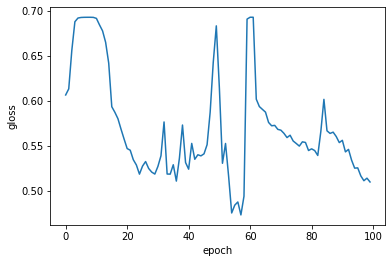

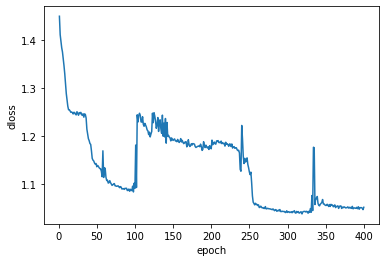

In [875]:
train(datasets, EPOCHS)